In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as cm
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy import units as u
#import aplpy
from matplotlib.gridspec import GridSpec
import astropy.io.fits as pyfits
from matplotlib.patches import Circle
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
import matplotlib.colors as mc
from astropy.table import Table
import matplotlib as mpl
import cmasher as cmr

from reproject import reproject_interp


In [5]:
from platform import python_version

print(python_version())

3.9.13


# RGB Image using H Perry's code!

In [6]:
###Making RGB figure using H Perry's easy_rgb code####

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
from astropy.visualization import (MinMaxInterval,
                                  PercentileInterval,
                                  LogStretch,
                                  ImageNormalize)

In [7]:
### The particular naming scheme is not relevant to you probably
### load in the fits hdus for each file
### this assumes all data are 2D and on the same pixel grid.


### f1 becomes blue
### f2 becoms green
### f3 becomes red
region1_f2_hdus = fits.open('./GLM_4_5um_raw.fits')
region1_f1_hdus = fits.open('./GLM_8um_raw.fits')
region1_f3_hdus = fits.open('./Herschel.fits')

### construct the wcs from one of them (they should all be the same, right?)
r1wcs = WCS(region1_f1_hdus[0])

#regrid the id contours to GLM
GLM8um = fits.open('./GLM_8um_raw.fits')[0]
id_contours = fits.open('../../FITS/id_mask_mosaic.fits')[0]
regrid_array, regrid_footprint = reproject_interp(id_contours, GLM8um.header)

pyfits.writeto('./id_mask_mosaic_regrid_to_8um.fits', regrid_array, GLM8um.header, overwrite=True)



In [8]:
np.linspace(1, 31, 5)

array([ 1. ,  8.5, 16. , 23.5, 31. ])

In [9]:
##Import Cloud Contours##
hdu_big_contours = fits.open('./full_catalogue_mask_regrid_to_glimpse_cutout_regrid.fits')[0]
hdu_G1602_contours = fits.open('./G1.601+0.012_mask_regrid.fits')[0]
hdu_G1652_contours = fits.open('./G1.652-0.052_mask_regrid.fits')[0]

hdu_id_contours = fits.open('./id_mask_mosaic_regrid_to_8um.fits')[0]


hdu_big_contours_hers = fits.open('./full_catalogue_mask_hers.fits')[0]
hdu_G1602_contours_hers = fits.open('./G1.601+0.012_mask_hers.fits')[0]
hdu_G1652_contours_hers = fits.open('./G1.652-0.052_mask_hers.fits')[0]



In [10]:
id_tab = Table.read("../Tables/CMZ_cloud_catalogue_data.csv")
leaf_id_num = id_tab['index']
id_l = id_tab['l']
id_b = id_tab['b']

In [11]:
id_tab

<Table length=47>
index    l       b      v   sigma   rad   absorp
int64 float64 float64 int64 int64 float64 int64 
----- ------- ------- ----- ----- ------- ------
    1  -0.525  -0.044  -102     6     4.3      3
    2  -0.492  -0.135   -56     9     8.7      3
    3  -0.439  -0.001   -90     8     2.7      0
    4  -0.405  -0.223   -27    13     4.6      3
    4  -0.405  -0.223    20     8     4.6      3
    5  -0.392   0.018   -78     5     2.0      1
    6  -0.312  -0.132   -29     5     5.6      0
    6  -0.312  -0.132   -21    12     5.6      0
    7  -0.299   0.032   -73    11     2.4      1
    7  -0.299   0.032   -37     5     2.4      1
    8  -0.135   0.023   -54     9     2.0      2
    8  -0.135   0.023    15    15     2.0      2
    8  -0.135   0.023    62     6     2.0      2
    9   -0.12  -0.081    15    12     5.0      1
   10  -0.021  -0.071    48    11     2.7      1
  ...     ...     ...   ...   ...     ...    ...
   22   0.413   0.048    19    11     2.9      1
   23   0.488   0.008    28    11     4.1      1
   24   0.645    0.03    53    12     1.4      2
   25   0.666  -0.028    62    12     5.8      1
   26   0.716   -0.09    28    15     5.7      3
   26   0.716   -0.09    58    11     5.7      3
   27   0.816  -0.185    39    15     6.4      3
   28   0.888  -0.044    14    11     6.8      3
   28   0.888  -0.044    26    30     6.8      3
   28   0.888  -0.044    84     8     6.8      3
   29   1.075  -0.049    74     6     8.5      3
   29   1.075  -0.049    85    16     8.5      3
   30   1.601   0.012    48     5     3.8      3
   30   1.601   0.012    58    11     3.8      3
   31   1.652  -0.052    50     6     3.7      3

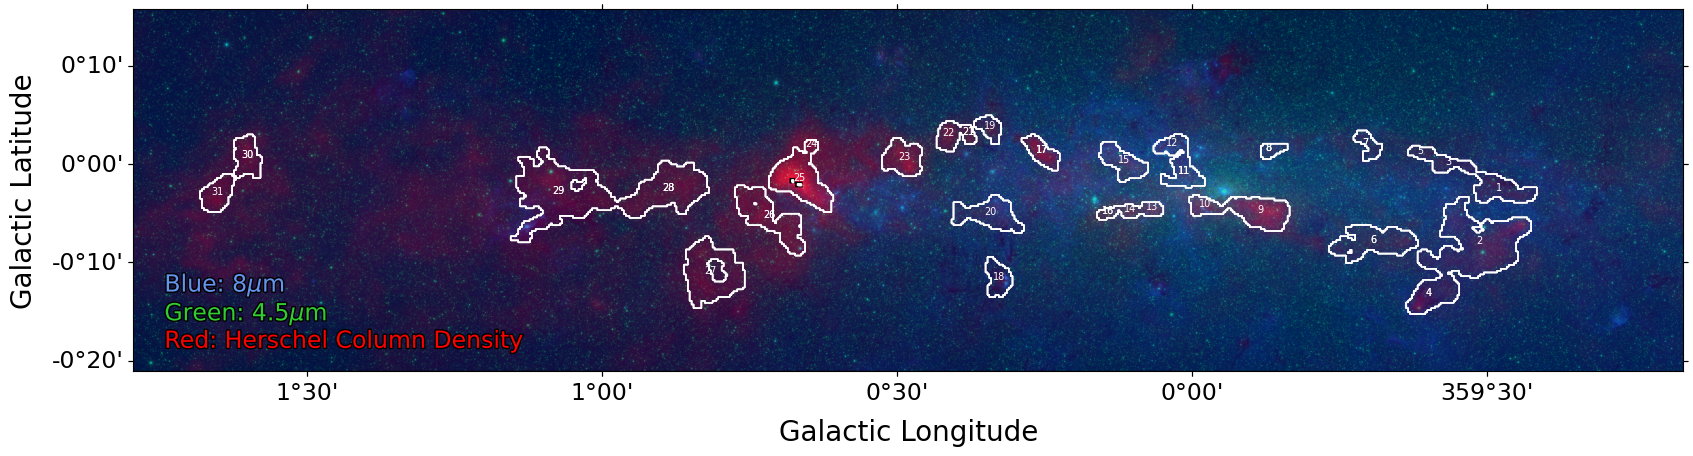

In [12]:
plt.rcParams.update({'font.size': 17})

### Time to make the figure!
fig, axes = plt.subplots(figsize=(20,10))

### Ok here's the fun part: we need to find a normalization for each color that makes it look
### good. This can be tricky, so try messing around with it for your images.
### Chances are, the default won't be great for you unless you're very lucky.
b = ImageNormalize(region1_f1_hdus[0].data,stretch=LogStretch(a=200),interval=MinMaxInterval())(region1_f1_hdus[0].data)
g = ImageNormalize(region1_f2_hdus[0].data,stretch=LogStretch(a=300),interval=MinMaxInterval())(region1_f2_hdus[0].data)
r = ImageNormalize(region1_f3_hdus[0].data,stretch=LogStretch(a=50),interval=MinMaxInterval())(region1_f3_hdus[0].data)

### Now we create the axes object with our correct projection
ax = plt.subplot(111, projection=r1wcs)
### here's the call to actually make the rgb figure using make_lupton_rgb instead of aplpy
rgb_default = make_lupton_rgb(r, g, b ,stretch=1,Q=1.0)
### Now actually show the grid using imshow
ax.imshow(rgb_default, origin='lower')
### Then label axes
ax.set_xlabel('Galactic Longitude',fontsize=20)
ax.set_ylabel('Galactic Latitude',fontsize=20)


contour_color = 'white'
cont = ax.contour(hdu_big_contours.data, levels=np.logspace(-4.7, -3., 10), colors=contour_color, alpha=0.5, linewidths = 1)
ax.contour(hdu_G1602_contours.data, levels=np.logspace(-4.7, -3., 10), colors=contour_color, alpha=0.5, linewidths = 1)
ax.contour(hdu_G1652_contours.data, levels=np.logspace(-4.7, -3., 10), colors=contour_color, alpha=0.5, linewidths = 1)

### Now I add just some nice path effects to make the label text legible
### I suggest changing out the frequency labels for the frequencies of your images
ax.text(0.02, 0.2, s='Blue: 8$\mu$m',color='cornflowerblue',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")],
        fontsize=17,ha='left', va='bottom', transform=ax.transAxes)

ax.text(0.02, 0.12, s='Green: 4.5$\mu$m',color='limegreen',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")],
        fontsize=17,ha='left', va='bottom', transform=ax.transAxes)

ax.text(0.02, 0.05, s='Red: Herschel Column Density',color='red',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")],
        fontsize=17,ha='left', va='bottom', transform=ax.transAxes)


for i in range(len(leaf_id_num)):
    ax.text(id_l[i]+0.01, id_b[i], s=leaf_id_num[i],color='white',
        fontsize=7, transform=ax.get_transform('galactic'))

### why not
#plt.tight_layout()

### then save!
plt.savefig('3DCMZ_rgb_fig.pdf', dpi=200, bbox_inches='tight')

In [13]:
###Open Files###
spitz_fits = pyfits.open('./GLM_8um.fits')
spitz = spitz_fits[0].data

spitz_smoothed_fits = pyfits.open('../../FITS/GLM_resid_I4_mosaic_cutout_FFT_smoothed_3arcmin_normed_kernel.fits')
spitz_smoothed = spitz_smoothed_fits[0].data

herschel_fits=pyfits.open('./Herschel.fits')
herschel=herschel_fits[0].data

herschel70um_fits=pyfits.open('../../FITS/hers70_combined_frames.fits')
herschel70um=herschel70um_fits[0].data


hdu_id_contours_hers_fits = fits.open('../../FITS/id_mask_mosaic_gridded.fits')[0]


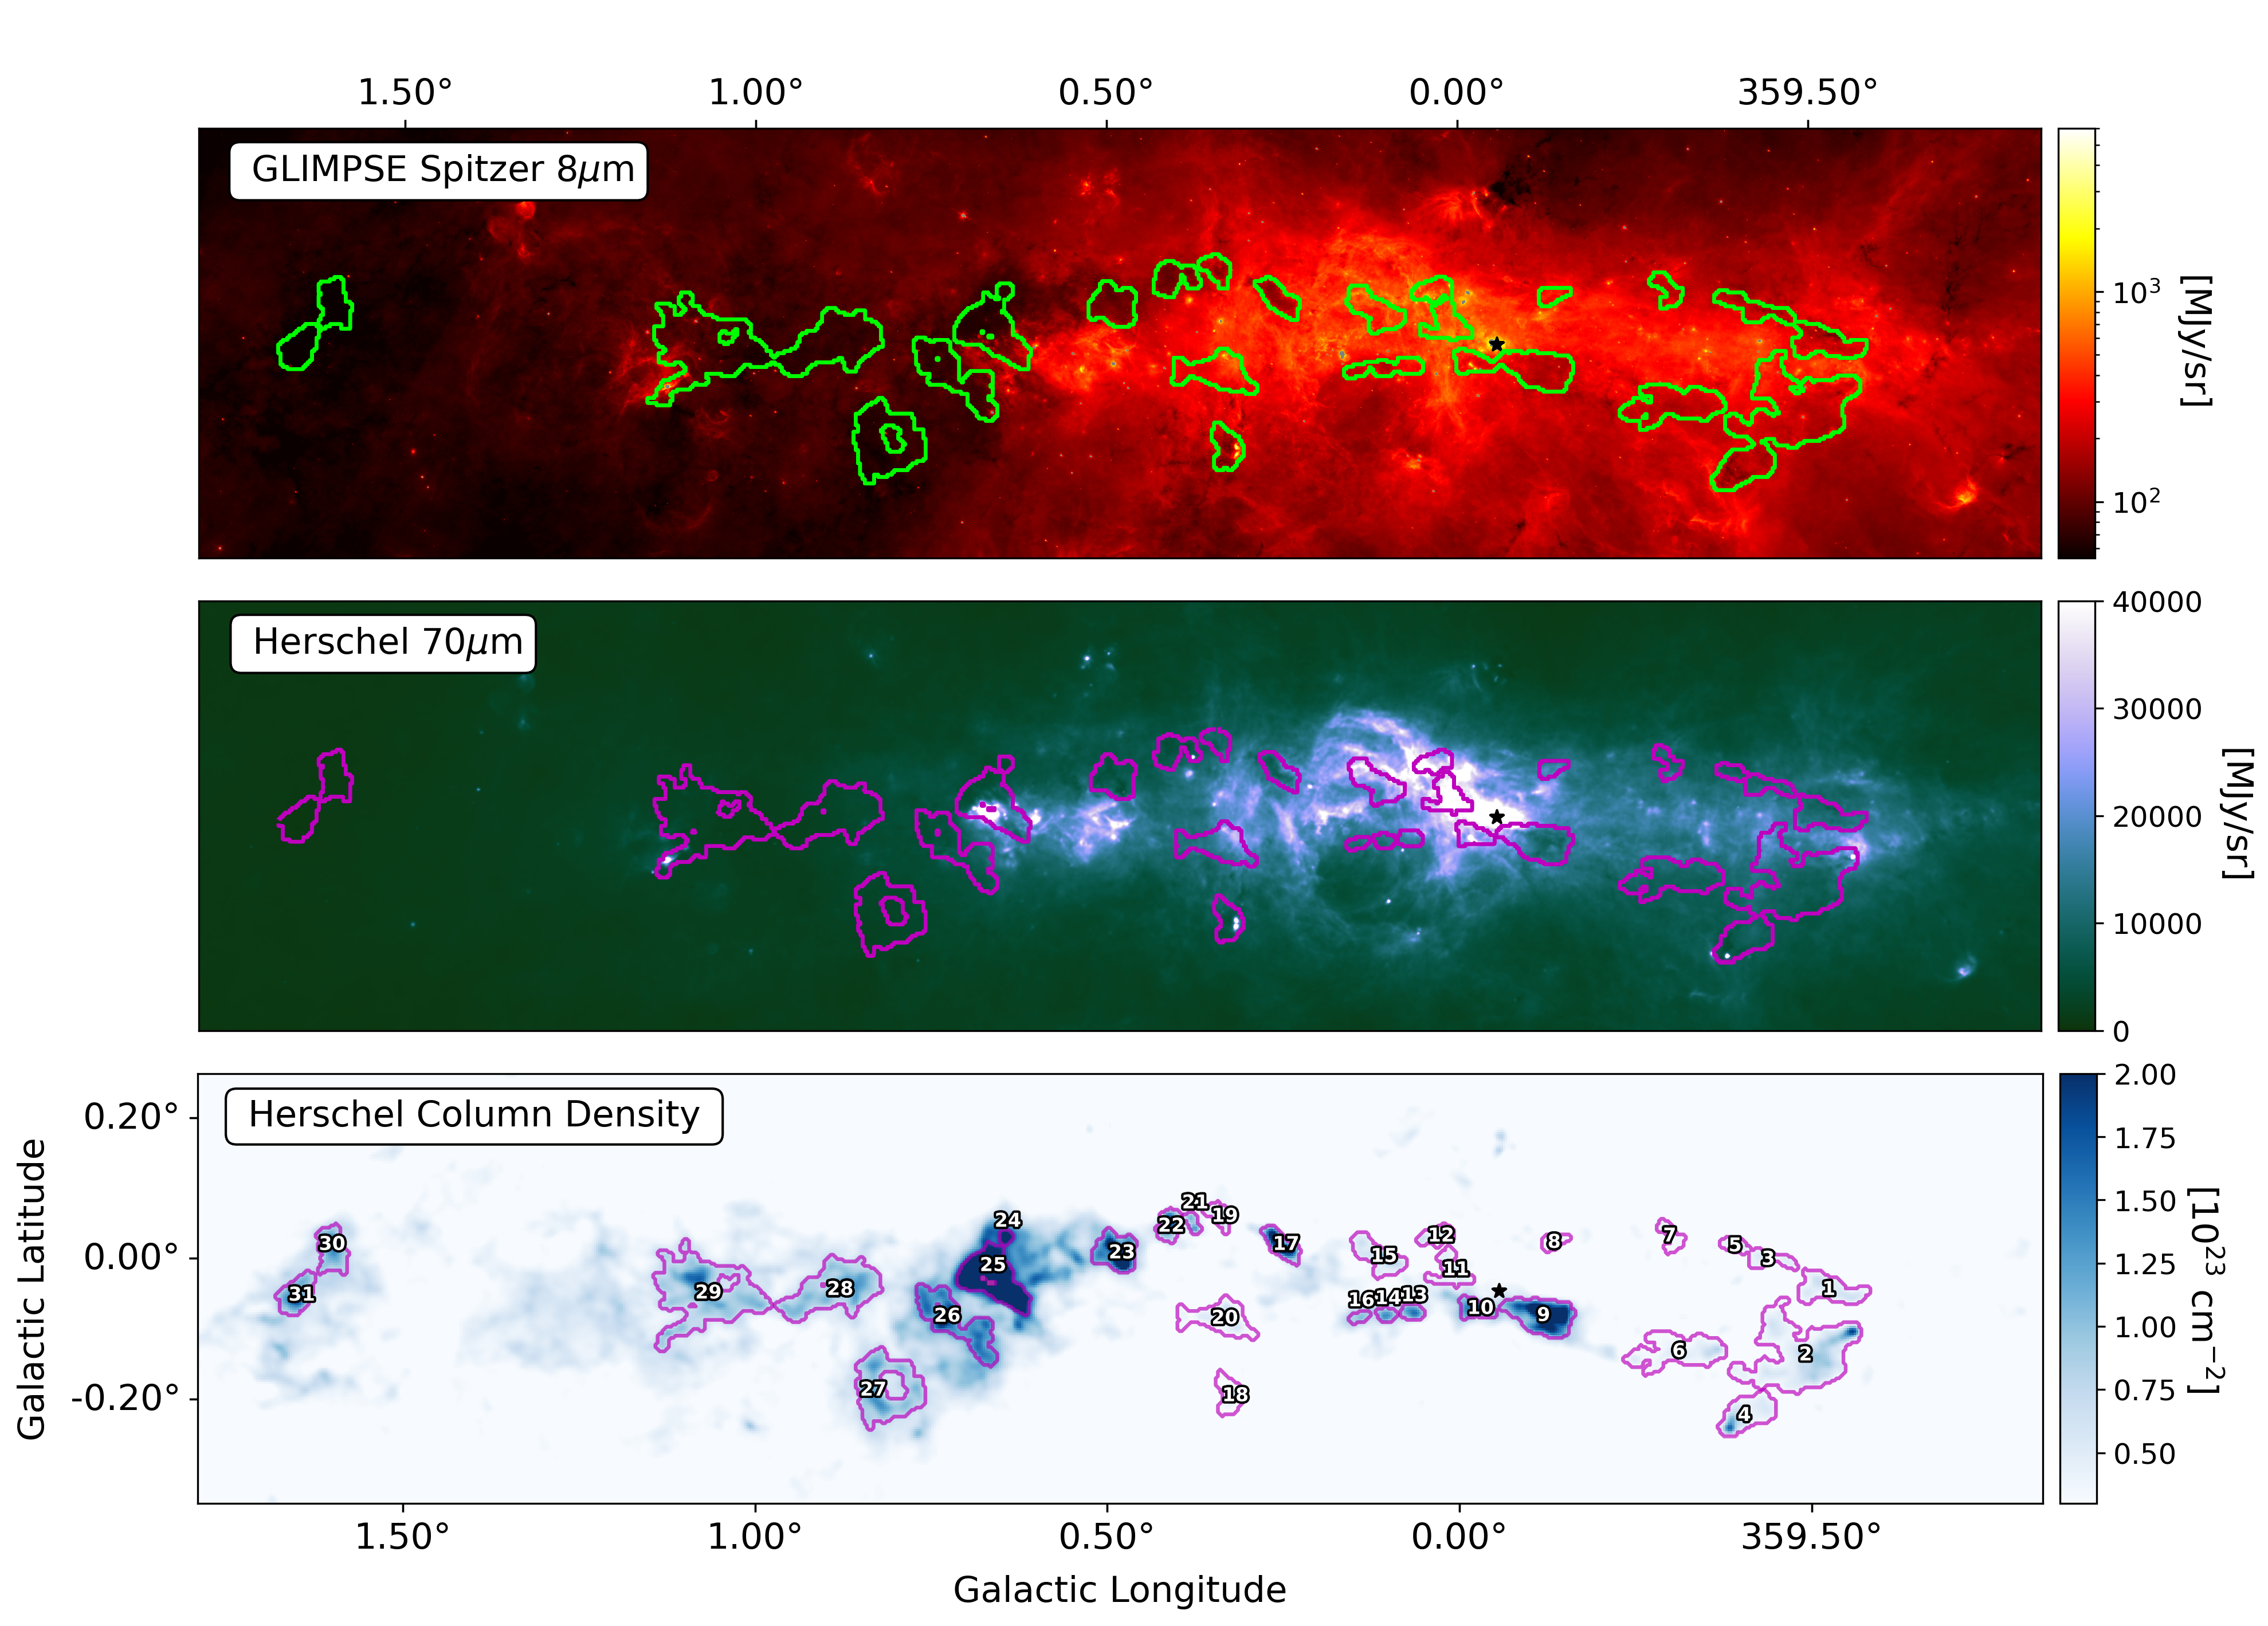

In [14]:
###Stack of Spitzer 8um and Herschel with Cloud contours###
import matplotlib.patheffects as PathEffects

plt.rcParams.update({"axes.facecolor" : "gray"}) 

fxsz = 40
xyrat = 2./8.
fysz = fxsz * xyrat
ds = 0.1
fig = plt.figure( figsize=(20,10), dpi=300)
gs = GridSpec(3,1)
gs.update(left=ds, right=1-ds, bottom=ds, top=1-ds, hspace=0.1, wspace=0)

hdu_spitz = pyfits.open('./GLM_8um.fits')[0]
wcs = WCS(hdu_spitz.header)

hdu_hers = fits.open('./hers_col_den_cutout_region.fits')[0]
wcs_hers = WCS(hdu_hers.header)

hdu_hers70 = fits.open('../../FITS/hers70_combined_frames.fits')[0]
wcs_hers70 = WCS(hdu_hers70.header)
hdu_big_contours_70 = fits.open('../../FITS/full_catalogue_mask_regrid_to_herschel70um.fits')[0]


axes1 = plt.subplot(gs[0, :1], projection=wcs)
axes2 = plt.subplot(gs[1, :1], projection=wcs_hers70)
axes3 = plt.subplot(gs[2,:1], projection=wcs_hers)


#spitz_imshow = axes1.imshow(hdu_spitz.data, vmin=0, vmax=950, origin='lower', cmap = 'hot')
spitz_imshow = axes1.imshow(hdu_spitz.data, norm=LogNorm(vmin=54, vmax=6000), origin='lower', cmap = 'hot')

axes1.contour(hdu_big_contours.data, levels=np.logspace(-4.7, -3., 10), colors='lime', alpha=0.5)
axes1.contour(hdu_G1602_contours.data, levels=np.logspace(-4.7, -3., 10), colors='lime', alpha=0.5)
axes1.contour(hdu_G1652_contours.data, levels=np.logspace(-4.7, -3., 10), colors='lime', alpha=0.5)




axes1.set_ylabel(' ')
axes1.set_xlabel(' ')
axes1.tick_params(axis='x', bottom=False, labelbottom=False)
axes1.tick_params(axis='y', left=False, labelleft=False)
axes1.text(0.13, 0.90, r' GLIMPSE Spitzer $8\mu$m ', ha='center', va='center', transform=axes1.transAxes,
           bbox=dict(boxstyle = 'round', facecolor='white', edgecolor='k', alpha=1), fontsize=15)


#hers70_imshow = axes2.imshow(hdu_hers70.data, origin='lower', cmap = 'gist_gray',vmin=800, vmax=27000)
#hers70_imshow = axes2.imshow(hdu_hers70.data, origin='lower', cmap = 'gist_gray',norm = cm.LogNorm(vmin=800, vmax=700000))
hers70_imshow = axes2.imshow(hdu_hers70.data, origin='lower', cmap = 'cmr.horizon', vmin=0, vmax=40000)

axes2.contour(hdu_big_contours_70.data, levels=np.logspace(-4.7, -3., 10), colors='m', alpha=0.5 )

axes2.set_ylabel(' ')
axes2.set_xlabel(' ')
axes2.tick_params(axis='x', bottom=False, labelbottom=False)
axes2.tick_params(axis='y', left=False, labelleft=False)
axes2.text(0.1, 0.90, r' Herschel $70\mu$m ', ha='center', va='center', transform=axes2.transAxes,
           bbox=dict(boxstyle = 'round', facecolor='white', edgecolor='k', alpha=1), fontsize=15)







#axes3.imshow(hdu_hers.data, vmin=3e22, vmax=2e23, origin='lower', cmap= 'Blues')
hers_imshow = axes3.imshow(hdu_hers.data/1e23, origin='lower', cmap= 'Blues', vmin=3e22/1e23, vmax=2e23/1e23) #norm = cm.LogNorm(vmin=3e22, vmax=2e23))


axes3.contour(hdu_id_contours_hers_fits.data, levels=np.logspace(-4, -3., 10), colors='m', alpha=0.1)

axes3.text(0.15, 0.90, r' Herschel Column Density ', ha='center', va='center', transform=axes3.transAxes,
           bbox=dict(boxstyle = 'round', facecolor='white', edgecolor='k', alpha=1), fontsize=15)

text_list=[]
text_color = 'w'
for i in range(len(leaf_id_num)):
    text_list.append(axes3.text(id_l[i]+0.01, id_b[i]-0.008,s=leaf_id_num[i],color=text_color, fontsize=8, 
                                weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic')))

i=1 #ID 2
text_list[i].remove()
text_list[i]=axes3.text(id_l[i]+0.01, id_b[i]-0.01,s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))


i=19 #ID 13
text_list[i].remove()
text_list[i]=axes3.text(id_l[i]+0.015, id_b[i]+0.015,s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))

    
i=20 #ID 14
text_list[i].remove()
text_list[i]=axes3.text(id_l[i]+0.015, id_b[i]+0.015,s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))
                 
i=22 #ID 16
text_list[22].remove()
text_list[23].remove()
text_list[i]=axes3.text(id_l[i]+0.015, id_b[i]+0.015,s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))
    
i=30 #ID 21
text_list[30].remove()
text_list[31].remove()
text_list[i]=axes3.text(id_l[i]+0.015, id_b[i]+0.021,s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))

i=32 #ID 22
text_list[i].remove()
text_list[i]=axes3.text(id_l[i]+0.015, id_b[i]-0.01,s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))
         
i=34 #ID 24
text_list[i].remove()
text_list[i]=axes3.text(id_l[i]+0.015, id_b[i]+0.015,s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))
           
i=35 #ID 25
text_list[i].remove()
text_list[i]=axes3.text(id_l[i]+0.015, id_b[i]+0.01,s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))
            
    
i=36 #ID 26
text_list[i].remove()
text_list[37].remove()
text_list[i]=axes3.text(id_l[i]+0.03, id_b[i],s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))
              

i=38 #ID 27
text_list[i].remove()
text_list[i]=axes3.text(id_l[i]+0.035, id_b[i]-0.01,s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))
              

i=44 #ID 30
text_list[i].remove()
text_list[45].remove()

text_list[i]=axes3.text(id_l[i]+0.018, id_b[i],s=leaf_id_num[i],color=text_color, fontsize=8, 
                        weight='bold',path_effects=[PathEffects.withStroke(linewidth=2, foreground="black")], transform=axes3.get_transform('galactic'))




#plot SgrA*
axes1.scatter(-0.056, -0.046, marker = "*", s=35, color='k', transform=axes1.get_transform('world'))
axes2.scatter(-0.056, -0.046, marker = "*", s=35, color='k', transform=axes2.get_transform('world'))
axes3.scatter(-0.056, -0.046, marker = "*", s=35, color='k', transform=axes3.get_transform('world'))

#axes1.text(-0.12,-0.04, r'SgrA*', ha='center', va='center', color='white', transform=axes1.get_transform('world'),fontsize=10)






from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes

divider1 = make_axes_locatable(axes1)
divider2 = make_axes_locatable(axes2)
divider3= make_axes_locatable(axes3)
cax1 = divider1.append_axes("right", size="2%", pad=0.1,  axes_class=maxes.Axes)
cax2 = divider2.append_axes("right", size="2%", pad=0.1,  axes_class=maxes.Axes)
cax3 = divider3.append_axes("right", size="2%", pad=0.1,  axes_class=maxes.Axes)

cb1 = fig.colorbar(spitz_imshow, orientation="vertical", cax = cax1)
cb1.set_label(label = r'[MJy/sr]', labelpad=20, y=0.5, rotation=-90, fontsize = 15)
cb1.ax.tick_params(labelsize=12)

cb2 = fig.colorbar(hers70_imshow, orientation="vertical", cax = cax2)
cb2.set_label(label = r'[MJy/sr]', labelpad=20, y=0.5, rotation=-90, fontsize = 15)
cb2.ax.tick_params(labelsize=12)



cb3 = fig.colorbar(hers_imshow, orientation="vertical", cax = cax3)
cb3.set_label(label = r'[10$^{23}$ cm$^{-2}]$', labelpad=20, y=0.5, rotation=-90, fontsize = 15)
cb3.ax.tick_params(labelsize=12)






    
lon = axes3.coords[0]
lat = axes3.coords[1]

lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')

axes3.set_ylabel('Galactic Latitude', fontsize=15)
axes3.set_xlabel('Galactic Longitude', fontsize=15)
axes3.tick_params(axis='x', labelsize=15)
axes3.tick_params(axis='y', labelsize=15)


lon.set_ticks_position('b')
lon.set_ticklabel_position('b')
lon.set_axislabel_position('b')
lat.set_ticks_position('l')
lat.set_ticklabel_position('l')
lat.set_axislabel_position('l')

#lon_mid = axes2.coords[0]
#lon_mid.set_major_formatter('d.dd')
#lon_mid.set_ticks_position('b')
#lon_mid.set_ticklabel_position('b')
#lon_mid.set_axislabel_position('b')

axes1.tick_params(axis='x', labelsize=15)
axes1.tick_params(axis='y', labelsize=15)
lon_top = axes1.coords[0]
lon_top.set_major_formatter('d.dd')
lon_top.set_ticks_position('t')
lon_top.set_ticklabel_position('t')
lon_top.set_axislabel_position('t')



plt.savefig("GLM_70Hers_HersColDen_Maps_contours_adjustedcolor.pdf", bbox_inches='tight')

In [15]:
#for i in range(len(text_list)):
#    print(i, text_list[i])

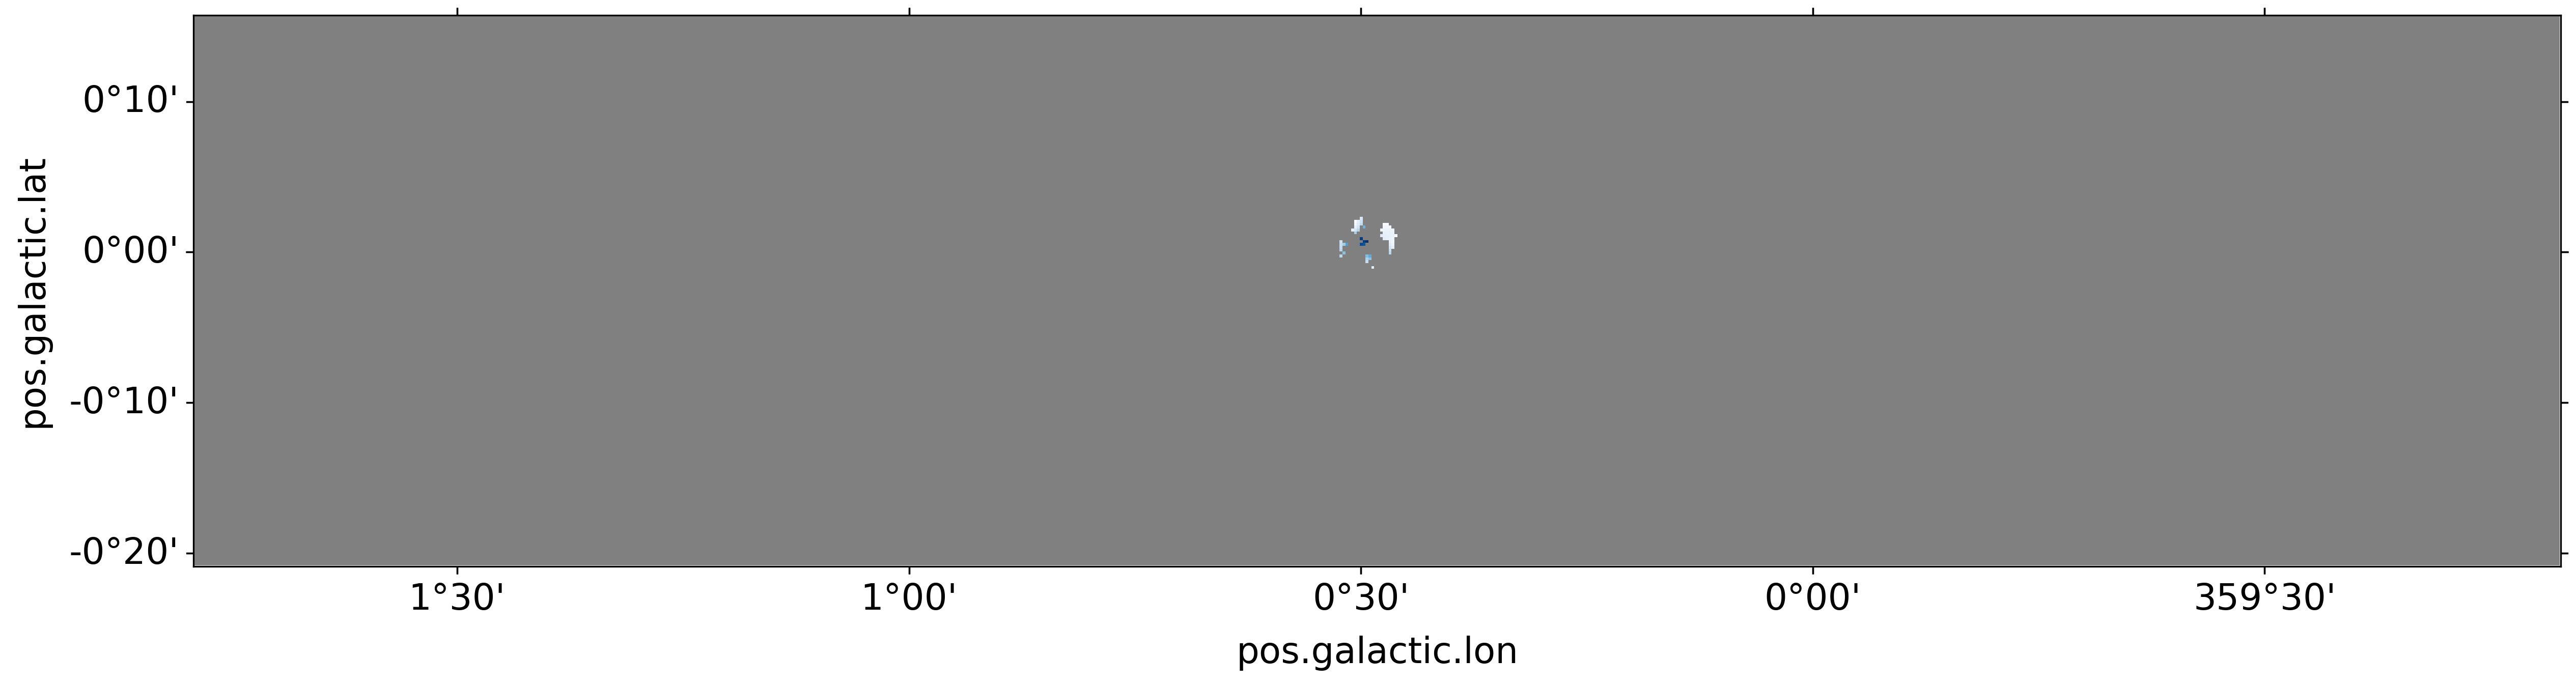

In [16]:
import FITS_tools #https://github.com/keflavich/FITS_tools/tree/master/FITS_tools
from reproject import reproject_interp

cloud_list = ["G359.475-0.044", "G359.508-0.135", "G359.561-0.001", "G359.595-0.223","G359.608+0.018",
              "G359.688-0.132", "G359.701+0.032", "G359.865+0.023", "G359.88-0.081", "G359.979-0.071",
              "G0.014-0.016","G0.035+0.032", "G0.068-0.076", "G0.105-0.08", "G0.116+0.003", "G0.143-0.083",
              "G0.255+0.02", "G0.327-0.195", "G0.342+0.06",  "G0.342-0.085", "G0.379+0.05", "G0.413+0.048", 
              "G0.488+0.008", "G0.645+0.03",  "G0.666-0.028", "G0.716-0.09", "G0.816-0.185" , "G0.888-0.044",
              "G1.075-0.049","G1.601+0.012", "G1.652-0.052"  ]

cloud_list = ["G0.488+0.008"]

hers_cutout = fits.open('./hers_col_den_cutout_region.fits')[0]
map_70um_masked = np.empty_like(hers_cutout.data)
map_70um_masked.fill(np.nan)

wcs = WCS(hers_cutout.header)



fig = plt.figure( figsize=(20,10), dpi=300)
axes1 = plt.subplot(projection=wcs)
lon = axes1.coords[0]
lat = axes1.coords[1]
axes1.set_facecolor('grey')
for cloud in cloud_list:

    hdu_ExtN_cloud = pyfits.open('../../Cloud_masks/{}/{}_ExtN70um_sources_to_nans_ffore{:.2f}_cutout_smoothed_conv36_regrid_isolated.fits'.format(cloud,cloud, 0.50))[0]
    cloud_wcs = WCS(hdu_ExtN_cloud.header)

    regrid_array, regrid_footprint = reproject_interp(hdu_ExtN_cloud, hers_cutout.header)

    map_70um_masked[np.where(np.isnan(regrid_array)==False)] = regrid_array[np.where(np.isnan(regrid_array)==False)]
    
    axes1.imshow(regrid_array, origin='lower', cmap = 'Blues', )
    

#pyfits.writeto('./70um_ExtN_ffore0.50_full_map.fits', map_70um_masked, hers_cutout.header, overwrite=True)       



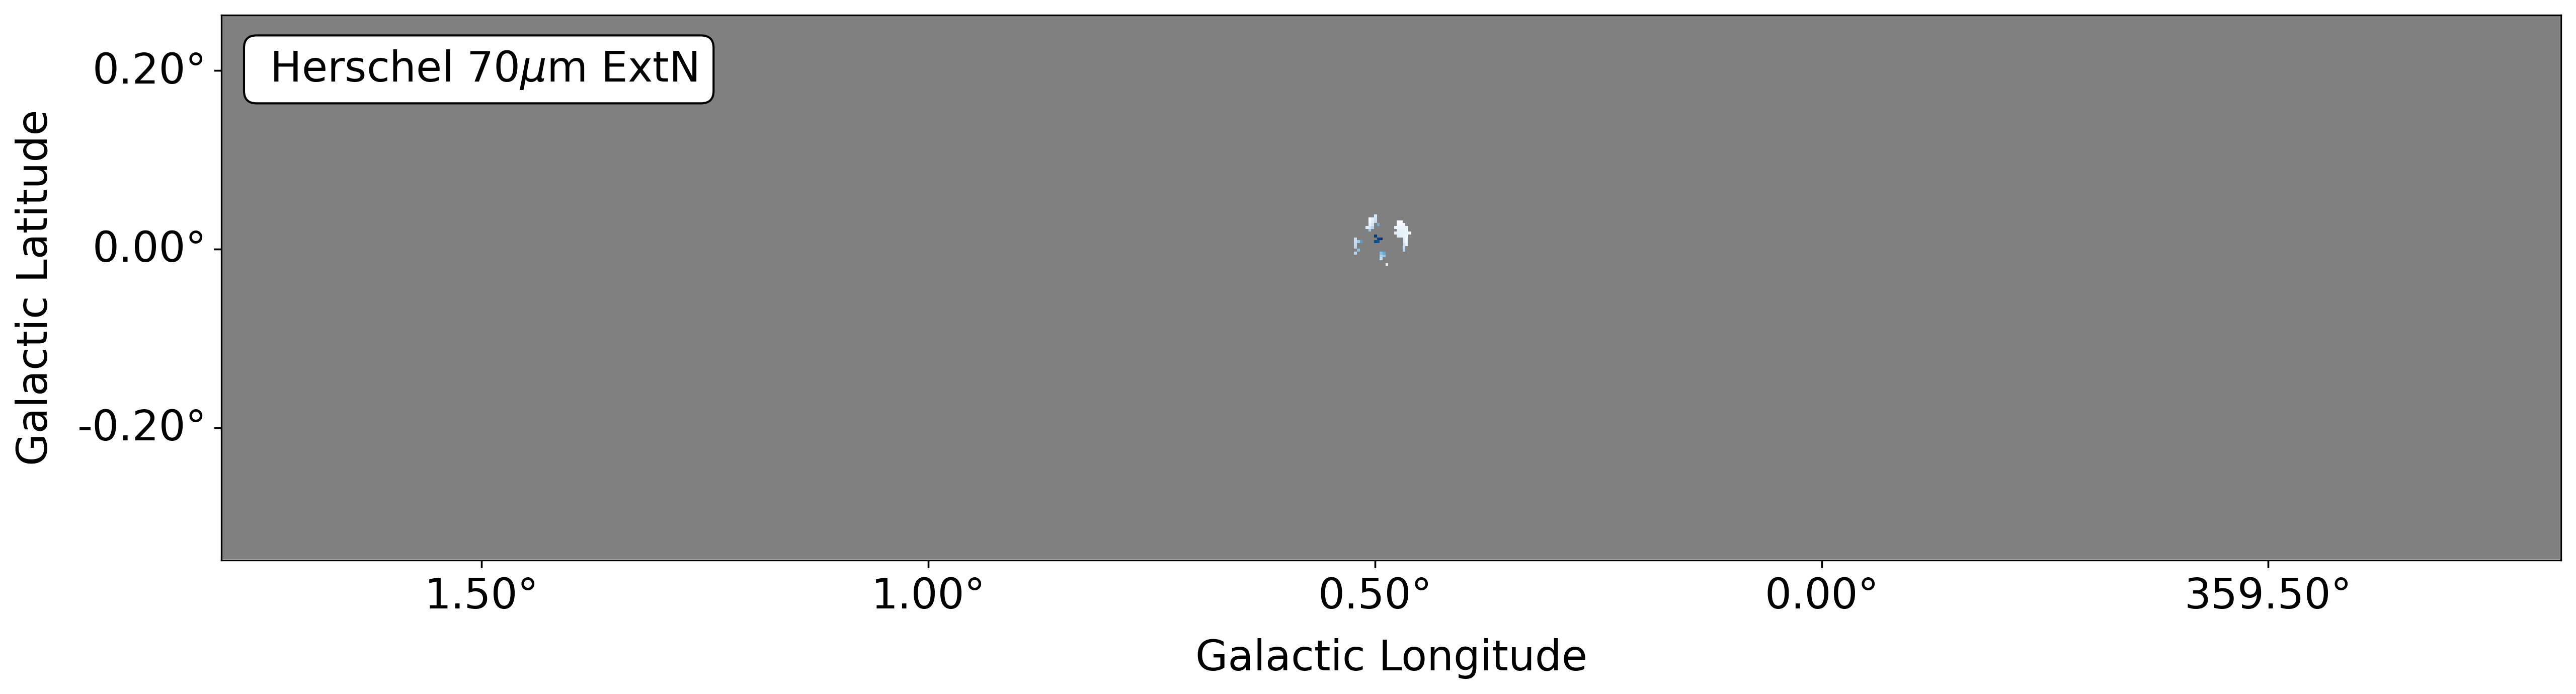

In [17]:
fig = plt.figure( figsize=(20,10), dpi=300)
hdu_big_contours_70 = fits.open('../../FITS/full_catalogue_mask_regrid_to_herschel70um.fits')[0]

axes1 = plt.subplot(projection=wcs)


axes1.text(0.11, 0.90, r' Herschel $70 \mu$m ExtN ', ha='center', va='center', transform=axes1.transAxes,
           bbox=dict(boxstyle = 'round', facecolor='white', edgecolor='k', alpha=1), fontsize=20)

axes1.set_facecolor('grey')
axes1.set_ylabel('Galactic Latitude', fontsize=20)
axes1.set_xlabel('Galactic Longitude', fontsize=20)
axes1.tick_params(axis='x', labelsize=20)
axes1.tick_params(axis='y', labelsize=20)

lon = axes1.coords[0]
lat = axes1.coords[1]

lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')
lon.set_ticks_position('b')
lon.set_ticklabel_position('b')
lon.set_axislabel_position('b')
lat.set_ticks_position('l')
lat.set_ticklabel_position('l')
lat.set_axislabel_position('l')


axes1.imshow(regrid_array, origin='lower', cmap = 'Blues')



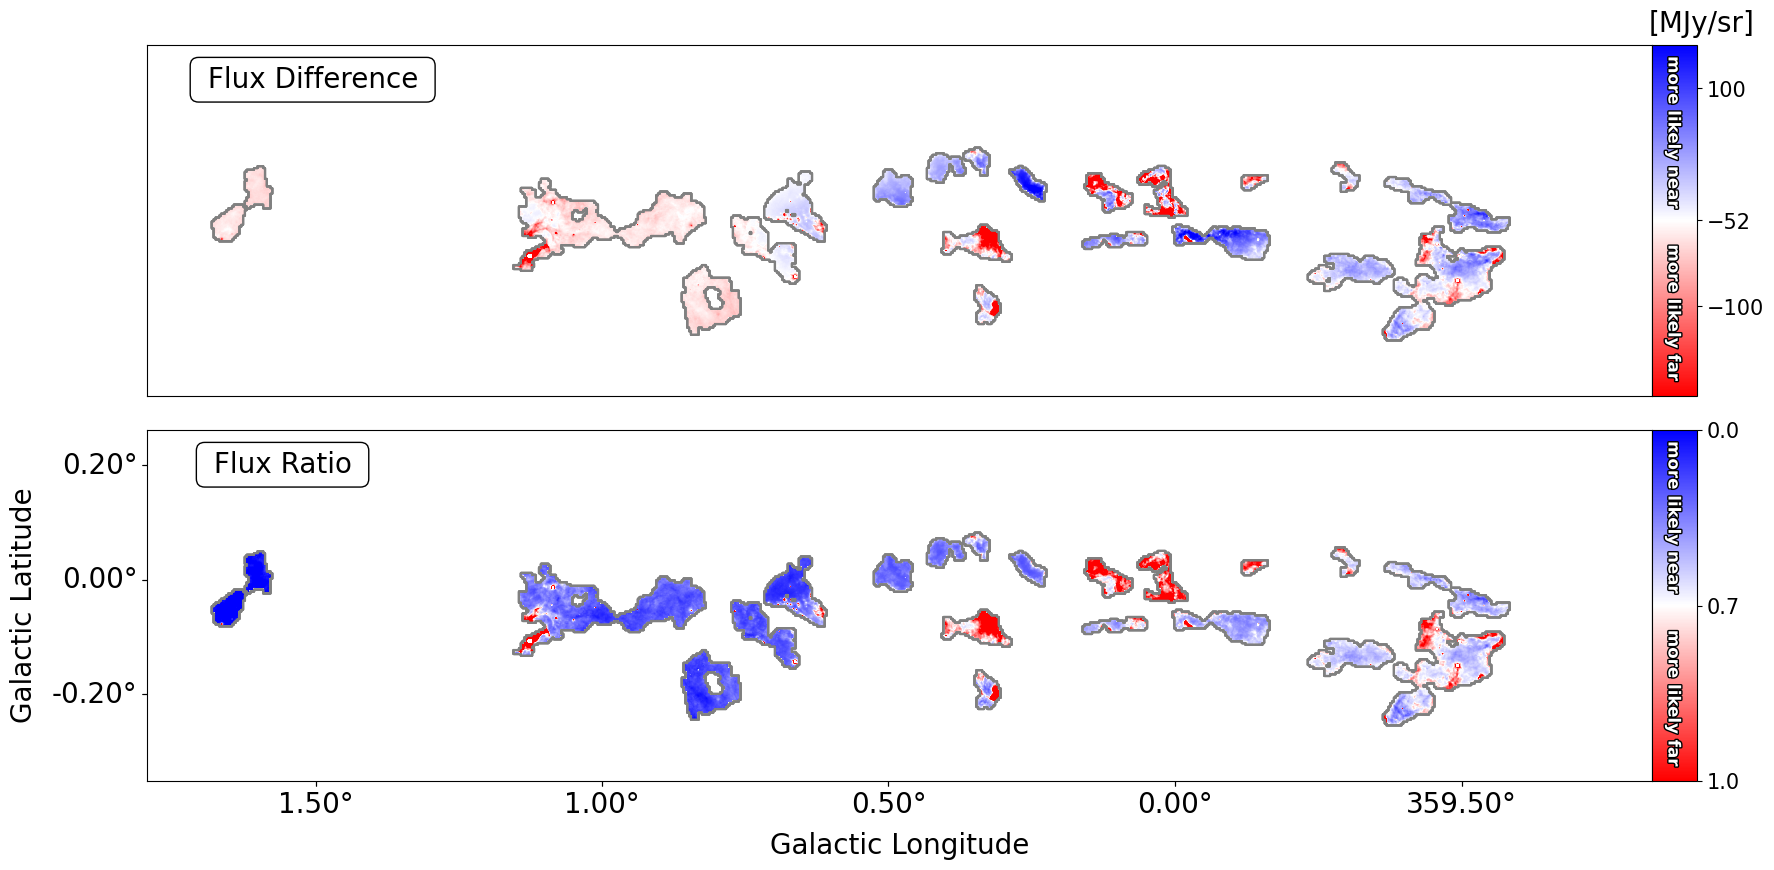

In [21]:
###MAKE STACK MAP OF ALL NEW METHODS###

flux_diff_map = (spitz_smoothed - spitz) - 72.77

flux_ratio_map = (spitz - 52.09)/spitz_smoothed




flux_diff_masked = np.empty_like(flux_diff_map)
flux_ratio_masked = np.empty_like(flux_ratio_map)
flux_diff_masked.fill(np.nan)
flux_ratio_masked.fill(np.nan)


flux_diff_masked[np.where(hdu_big_contours.data ==1)] = flux_diff_map[np.where(hdu_big_contours.data ==1)]
flux_diff_masked[np.where(hdu_G1602_contours.data >0)] = flux_diff_map[np.where(hdu_G1602_contours.data >0)]
flux_diff_masked[np.where(hdu_G1652_contours.data >0)] = flux_diff_map[np.where(hdu_G1652_contours.data >0)]

flux_ratio_masked[np.where(hdu_big_contours.data ==1)] = flux_ratio_map[np.where(hdu_big_contours.data ==1)]
flux_ratio_masked[np.where(hdu_G1602_contours.data >0)] = flux_ratio_map[np.where(hdu_G1602_contours.data >0)]
flux_ratio_masked[np.where(hdu_G1652_contours.data >0)] = flux_ratio_map[np.where(hdu_G1652_contours.data >0)]

###Stack of Flux Difference and Flux Ratio full maps contours###



hdu_spitz = pyfits.open('./GLM_8um.fits')[0]
wcs = WCS(hdu_spitz.header)


fig, ax = plt.subplots(nrows=2, subplot_kw={'projection': wcs}, figsize = (20,10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.0, hspace=0.0)


cont_color = 'grey'

divnorm =mc.TwoSlopeNorm(vmin=-150, vcenter=-52.09, vmax=150 )
flux_diff_show = ax[0].imshow(flux_diff_masked, origin='lower', cmap = 'bwr_r', norm = divnorm)
ax[0].contour(hdu_big_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax[0].contour(hdu_G1602_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax[0].contour(hdu_G1652_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)



ax[0].set_ylabel('Galactic Latitude', fontsize=20)
ax[0].set_facecolor('white')
ax[0].set_xlabel(' ')
ax[0].tick_params(axis='x', bottom=False, labelbottom=False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[0].text(0.11, 0.90, r' Flux Difference ', ha='center', va='center', transform=ax[0].transAxes,
           bbox=dict(boxstyle = 'round', facecolor='white', edgecolor='k', alpha=1), fontsize=20)




divnorm =mc.TwoSlopeNorm(vmin=0, vcenter=0.699, vmax=1 )
wcs = WCS(hdu_spitz.header)
flux_ratio_show = ax[1].imshow(flux_ratio_masked, origin='lower', cmap= 'bwr', norm = divnorm)

ax[1].contour(hdu_big_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax[1].contour(hdu_G1602_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax[1].contour(hdu_G1652_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
#ax[1].tick_params(axis='x', top=False, labelbottom=False)
#ax[1].tick_params(axis='y', left=False, labelleft=False)
ax[1].text(0.09, 0.90, r' Flux Ratio ', ha='center', va='center', transform=ax[1].transAxes,
           bbox=dict(boxstyle = 'round', facecolor='white', edgecolor='k', alpha=1), fontsize=20)

lon = ax[1].coords[0]
lat = ax[1].coords[1]

lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')

ax[1].set_ylabel('Galactic Latitude', fontsize=20)
ax[1].set_xlabel('Galactic Longitude', fontsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)

ax[1].set_facecolor('white')

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes

divider1 = make_axes_locatable(ax[0])
divider2= make_axes_locatable(ax[1])
cax1 = divider1.append_axes("right", size="3%", pad=0.0,  axes_class=maxes.Axes)
cax2 = divider2.append_axes("right", size="3%", pad=0.0,  axes_class=maxes.Axes)


cb1 = fig.colorbar(flux_diff_show, orientation="vertical", cax = cax1 , ticks=[-100, -52., 100] )
cb1.set_label(label = r'[MJy/sr]', labelpad=-45, y=1.1, rotation=0, fontsize = 20)
cb1.ax.tick_params(labelsize=15)
cb1.ax.text(0.3, -35, r'more likely near', color='white', rotation=-90, fontsize=12, weight='bold',path_effects=[pe.withStroke(linewidth=2, foreground="black")])
cb1.ax.text(0.3, -140, r'more likely far', color='white', rotation=-90, fontsize=12, weight='bold',path_effects=[pe.withStroke(linewidth=2, foreground="black")])


cb2 = fig.colorbar(flux_ratio_show, orientation="vertical", cax = cax2 , ticks=[0, 0.7, 1.0])
cb2.ax.tick_params(labelsize=15)
cb2.ax.text(0.3, 0.64, r'more likely near', color='white', rotation=-90, fontsize=12, weight='bold',path_effects=[pe.withStroke(linewidth=2, foreground="black")])
cb2.ax.text(0.3, 0.97, r'more likely far', color='white', rotation=-90, fontsize=12, weight='bold',path_effects=[pe.withStroke(linewidth=2, foreground="black")])
cb2.ax.invert_yaxis()



lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')
lon.set_ticks_position('b')
lon.set_ticklabel_position('b')
lon.set_axislabel_position('b')
lat.set_ticks_position('l')
lat.set_ticklabel_position('l')
lat.set_axislabel_position('l')


plt.savefig("flux_diff_ratio_full_maps.png", bbox_inches='tight')


pyfits.writeto('./flux_diff_map.fits', flux_diff_masked, hdu_spitz.header, overwrite=True)
pyfits.writeto('./flux_ratio_map.fits', flux_ratio_masked, hdu_spitz.header, overwrite=True)



In [19]:
map_70um_masked = np.empty_like(hdu_hers70.data)
map_70um_masked.fill(np.nan)
np.shape(map_70um_masked)



(1839, 7882)

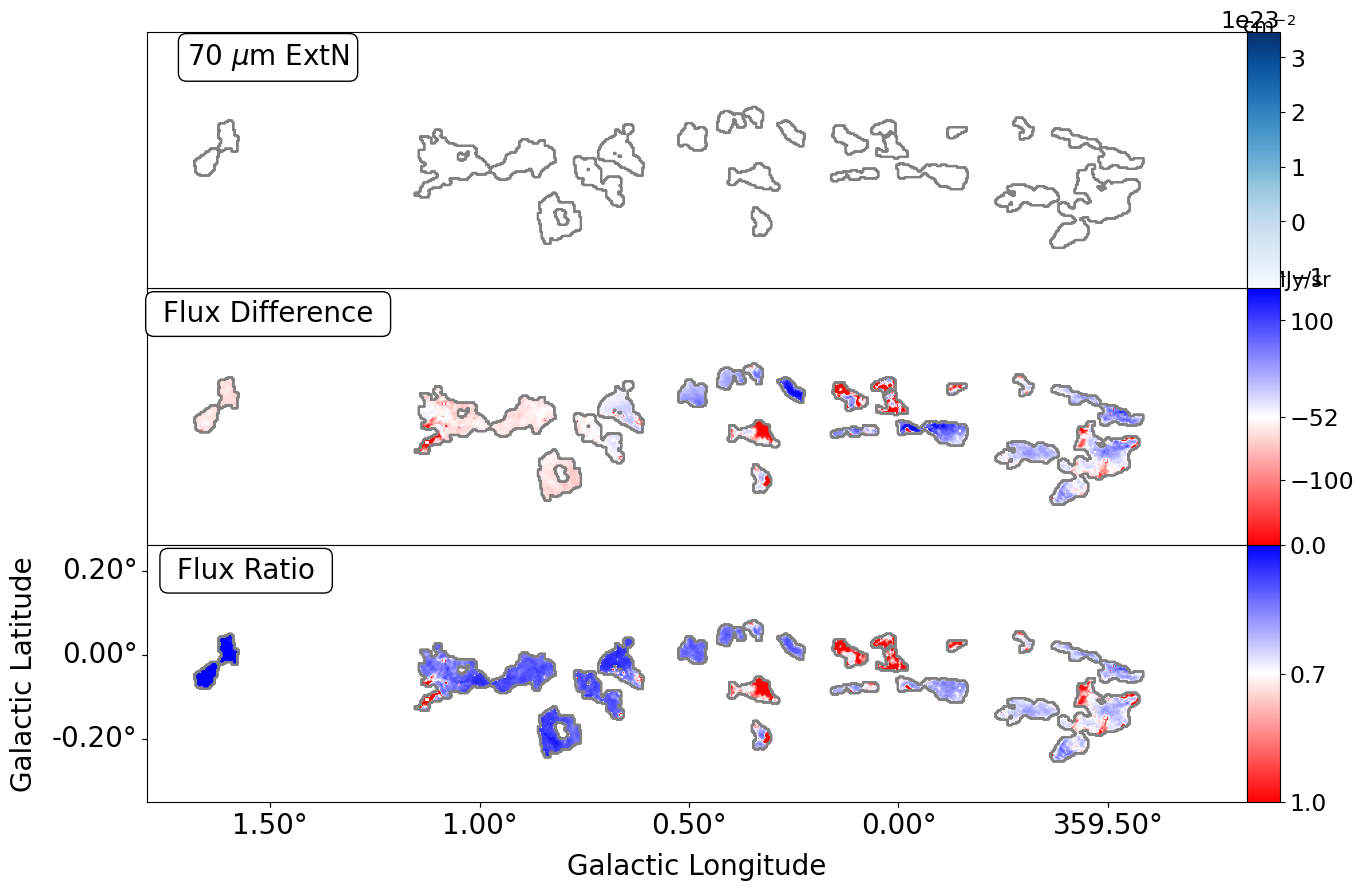

In [19]:
###Make overall flux diff and flux ratio maps?###

flux_diff_map = (spitz_smoothed - spitz) - 72.77

flux_ratio_map = (spitz - 52.09)/spitz_smoothed




flux_diff_masked = np.empty_like(flux_diff_map)
flux_ratio_masked = np.empty_like(flux_ratio_map)
flux_diff_masked.fill(np.nan)
flux_ratio_masked.fill(np.nan)


flux_diff_masked[np.where(hdu_big_contours.data ==1)] = flux_diff_map[np.where(hdu_big_contours.data ==1)]
flux_diff_masked[np.where(hdu_G1602_contours.data >0)] = flux_diff_map[np.where(hdu_G1602_contours.data >0)]
flux_diff_masked[np.where(hdu_G1652_contours.data >0)] = flux_diff_map[np.where(hdu_G1652_contours.data >0)]

flux_ratio_masked[np.where(hdu_big_contours.data ==1)] = flux_ratio_map[np.where(hdu_big_contours.data ==1)]
flux_ratio_masked[np.where(hdu_G1602_contours.data >0)] = flux_ratio_map[np.where(hdu_G1602_contours.data >0)]
flux_ratio_masked[np.where(hdu_G1652_contours.data >0)] = flux_ratio_map[np.where(hdu_G1652_contours.data >0)]


###Stack of Flux Difference and Flux Ratio full maps contours###



hdu_spitz = pyfits.open('./GLM_8um.fits')[0]
wcs = WCS(hdu_spitz.header)

hdu_70ExtN = pyfits.open('./70um_ExtN_ffore0.50_full_map.fits')[0]
wcs_70ExtN = WCS(hdu_70ExtN.header)

fig, ax = plt.subplots(nrows=3, subplot_kw={'projection': wcs}, figsize = (40,10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.0, hspace=0.0)

ax[0].remove()
ax_70 = fig.add_subplot(3,1,1, projection=wcs_70ExtN)
ax_70.set_facecolor('white')

ExtN70_show = ax_70.imshow(hdu_70ExtN.data, origin='lower', cmap = 'Blues', vmin = -1.2347e+23, vmax= 3.47248e+23)
cont_color = 'grey'
ax_70.contour(hdu_big_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax_70.contour(hdu_G1602_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax_70.contour(hdu_G1652_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)

ax_70.set_xlabel(' ')
ax_70.tick_params(axis='x', bottom=False, labelbottom=False)
ax_70.tick_params(axis='y', left=False, labelleft=False)
ax_70.text(0.11, 0.90, r'70 $\mu$m ExtN', ha='center', va='center', transform=ax_70.transAxes,
           bbox=dict(boxstyle = 'round', facecolor='white', edgecolor='k', alpha=1), fontsize=20)










cont_color = 'grey'
divnorm =mc.TwoSlopeNorm(vmin=-150, vcenter=-52.09, vmax=150 )
flux_diff_show = ax[1].imshow(flux_diff_masked, origin='lower', cmap = 'bwr_r', norm = divnorm)
ax[1].contour(hdu_big_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax[1].contour(hdu_G1602_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax[1].contour(hdu_G1652_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)



ax[1].set_ylabel('Galactic Latitude', fontsize=20)
ax[1].set_facecolor('white')
ax[1].set_xlabel(' ')
ax[1].tick_params(axis='x', bottom=False, labelbottom=False)
ax[1].tick_params(axis='y', left=False, labelleft=False)
ax[1].text(0.11, 0.90, r' Flux Difference ', ha='center', va='center', transform=ax[1].transAxes,
           bbox=dict(boxstyle = 'round', facecolor='white', edgecolor='k', alpha=1), fontsize=20)




divnorm =mc.TwoSlopeNorm(vmin=0, vcenter=0.699, vmax=1 )
wcs = WCS(hdu_spitz.header)
flux_ratio_show = ax[2].imshow(flux_ratio_masked, origin='lower', cmap= 'bwr', norm = divnorm)

ax[2].contour(hdu_big_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax[2].contour(hdu_G1602_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
ax[2].contour(hdu_G1652_contours.data, levels=np.logspace(-4.7, -3., 10), colors=cont_color, alpha=0.5)
#ax[2].tick_params(axis='x', top=False, labelbottom=False)
#ax[2].tick_params(axis='y', left=False, labelleft=False)
ax[2].text(0.09, 0.90, r' Flux Ratio ', ha='center', va='center', transform=ax[2].transAxes,
           bbox=dict(boxstyle = 'round', facecolor='white', edgecolor='k', alpha=1), fontsize=20)

lon = ax[2].coords[0]
lat = ax[2].coords[1]

lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')

ax[2].set_ylabel('Galactic Latitude', fontsize=20)
ax[2].set_xlabel('Galactic Longitude', fontsize=20)
ax[2].tick_params(axis='x', labelsize=20)
ax[2].tick_params(axis='y', labelsize=20)

ax[2].set_facecolor('white')

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes

divider1 = make_axes_locatable(ax[1])
divider2= make_axes_locatable(ax[2])
divider3= make_axes_locatable(ax_70)

cax1 = divider1.append_axes("right", size="3%", pad=0.0,  axes_class=maxes.Axes)
cax2 = divider2.append_axes("right", size="3%", pad=0.0,  axes_class=maxes.Axes)
cax3 = divider3.append_axes("right", size="3%", pad=0.0,  axes_class=maxes.Axes)


cb1 = fig.colorbar(flux_diff_show, orientation="vertical", cax = cax1 , ticks=[-100, -52., 100] )
cb1.set_label(label = r'MJy/sr', labelpad=-40, y=1.07, rotation=0, fontsize = 15)


cb2 = fig.colorbar(flux_ratio_show, orientation="vertical", cax = cax2 , ticks=[0, 0.7, 1.0])
cb2.ax.invert_yaxis()

cb3 = fig.colorbar(ExtN70_show, orientation="vertical", cax = cax3)
cb3.set_label(label = r'cm$^{-2}$', labelpad=-40, y=1.07, rotation=0, fontsize = 15)



lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')
lon.set_ticks_position('b')
lon.set_ticklabel_position('b')
lon.set_axislabel_position('b')
lat.set_ticks_position('l')
lat.set_ticklabel_position('l')
lat.set_axislabel_position('l')


plt.savefig("new_method_maps.png", bbox_inches='tight')



regrid_array, regrid_footprint = reproject_interp(hdu_id_contours_hers_fits, hers_cutout.header)

hers_cont_regrid70, regrid_footprint = reproject_interp(hers_hdu_file_cont, hers_hdu_70_file.header)
pyfits.writeto('./hers_col_den_cutout_region_regrid70.fits', hers_cont_regrid70, hers_hdu_70_file.header, overwrite=True)

In [20]:
spitz_hdu_file = pyfits.open('./GLM_8um.fits')[0] 
hers_hdu_file_cont = pyfits.open('./Herschel.fits')[0] 
hers_hdu_file = pyfits.open('hers_col_den_cutout_region.fits')[0] 
hers70_cont_file = pyfits.open('./hers_col_den_cutout_region_regrid70.fits')[0] 
hers_hdu_70_file = pyfits.open('../../FITS/destripe_l000_blue_wgls_rcal_cropped.fits')[0] 

In [21]:
def zoom_panels_3maps(l, b, size_l, size_b):

    #Cutout2D essentially makes a new WCS header for the cutout 
    #that you can use to create a new FITS file for the smaller region!
    size = u.Quantity([size_b, size_l], u.deg) #sets the size of the box you're taking a cutout of
    size70 = u.Quantity([size_b*0.90, size_l*0.90], u.deg) #sets the size of the box you're taking a cutout of
    spitz_cutout = Cutout2D(spitz_hdu_file.data, SkyCoord(l, b, unit="deg", frame='galactic'), 
                            size, wcs = WCS(spitz_hdu_file.header))



    
    plt.rcParams.update({'font.size': 11, "axes.facecolor" : "gray"}) 



    fig, ax = plt.subplots(nrows=3, ncols =1, subplot_kw={'projection': spitz_cutout.wcs})
    plt.subplots_adjust(wspace=0, hspace=0)



    #Show the plot!
    #The vmin and vmax are the scaling limits. You can change these around to 
    #make the plot look better
    #cmap is the colormap. You can look up different matplotlib cmaps to make it look pretty :)
    ax[0].imshow(spitz_cutout.data, norm=LogNorm(vmin=54, vmax=6000), origin='lower', cmap = 'hot')

    #contour_cutout_brick = Cutout2D(hdu_big_contours.data, SkyCoord(0.255, 0.02, unit="deg", frame='galactic'), size, wcs = wcs)
    #axes1.contour(contour_cutout_brick.data, levels=np.logspace(-4.7, -3., 10), colors='m', alpha=0.5)



    lon = ax[0].coords[0]
    lat = ax[0].coords[1]

    lon.set_major_formatter('d.dd')
    lat.set_major_formatter('d.dd')
    ax[0].set_ylabel(' ', fontsize=0)
    ax[0].set_xlabel(' ', fontsize=0)
    #ax[0].tick_params(axis='x', labelsize=20)
    #ax[0].tick_params(axis='y', labelsize=20)
    lon.set_ticks_visible(False)
    lon.set_ticklabel_visible(False)
    lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)
    lon.set_axislabel('')
    lat.set_axislabel('')





    size = u.Quantity([size_b, size_l], u.deg) #sets the size of the box you're taking a cutout of
    hers70_cutout = Cutout2D(hers_hdu_70_file.data, SkyCoord(l, b, unit="deg", frame='galactic'), 
                            size70, wcs = WCS(hers_hdu_70_file.header))

    hers_cont_cutout = Cutout2D(hers_hdu_file_cont.data, SkyCoord(l, b, unit="deg", frame='galactic'), 
                            size, wcs = WCS(hers_hdu_file_cont.header))
    
    hers70_cont_cutout = Cutout2D(hers70_cont_file.data, SkyCoord(l, b, unit="deg", frame='galactic'), 
                            size70, wcs = WCS(hers70_cont_file.header))    
    

    ax[1].remove()
    axs_mid = fig.add_subplot(3,1,2, projection=hers70_cutout.wcs)
    #Show the plot!
    #The vmin and vmax are the scaling limits. You can change these around to 
    #make the plot look better
    #cmap is the colormap. You can look up different matplotlib cmaps to make it look pretty :)
    axs_mid.imshow(hers70_cutout.data, cmap = 'cmr.horizon', vmin=0, vmax=40000, origin='lower')


    
    

    lon = axs_mid.coords[0]
    lat = axs_mid.coords[1]
    lon.set_major_formatter('d.dd')
    lat.set_major_formatter('d.dd')
    axs_mid.set_ylabel(' ', fontsize=0)
    axs_mid.set_xlabel(' ', fontsize=0)
    lon.set_ticks_visible(False)
    lon.set_ticklabel_visible(False)
    lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)
    lon.set_axislabel('')
    lat.set_axislabel('')    
    
    
    
    ##HERS COL DEN
    size = u.Quantity([size_b, size_l], u.deg) #sets the size of the box you're taking a cutout of
    hers_cutout = Cutout2D(hers_hdu_file.data, SkyCoord(l, b, unit="deg", frame='galactic'), 
                            size, wcs = WCS(hers_hdu_file.header))
    
    
    
    ax[2].remove()
    axs = fig.add_subplot(3,1,3, projection=hers_cutout.wcs)    
    
    
    axs.imshow(hers_cutout.data, vmin=3e22, vmax=2e23, origin='lower', cmap = 'Blues')


    
    
    ###Add Contours based on herschel column density 
    cont_levels = [3e22,5e22,7e22,10e22,15e22,20e22]
    ax[0].contour(hers_cont_cutout.data, levels=cont_levels, colors='lime', alpha=0.4)
    axs_mid.contour(hers70_cont_cutout.data, levels=cont_levels,colors='m', alpha=0.4)

    axs.contour(hers_cutout.data, levels=cont_levels,colors='m', alpha=0.4)
    

    
    lon = axs.coords[0]
    lat = axs.coords[1]

    lon.set_major_formatter('d.dd')
    lat.set_major_formatter('d.dd')
    lon.set_axislabel(' ', fontsize=0)
    lat.set_axislabel(' ', fontsize=0)
    #axs.tick_params(axis='x', labelsize=20)
    #axs.tick_params(axis='y', labelsize=20)

    lon.set_ticks_position('b')
    lon.set_ticklabel_position('b')
    lon.set_axislabel_position('b')
    lat.set_ticks_position('l')
    lat.set_ticklabel_position('l')
    lat.set_axislabel_position('l')

    
    plt.tight_layout(pad=0.0)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig("./{}_{}_GLM_Hers_Zooms_3map.pdf".format(l,b), bbox_inches='tight')

    plt.show()
    
    return 


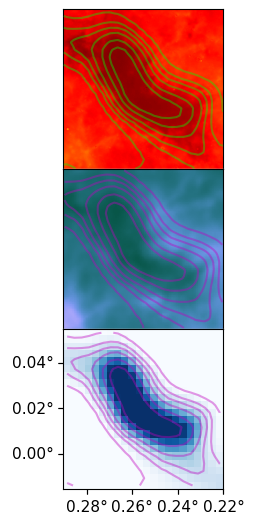

In [22]:
zoom_panels_3maps(0.255, 0.02, .07, .07)

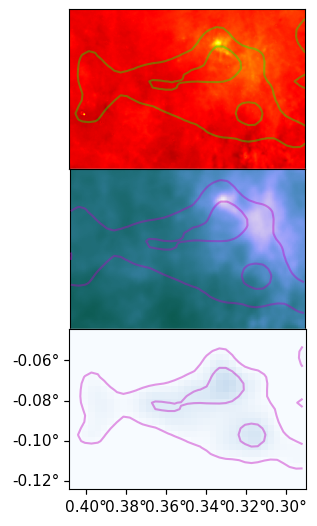

In [23]:
zoom_panels_3maps(0.348, -0.085, .118, .08)

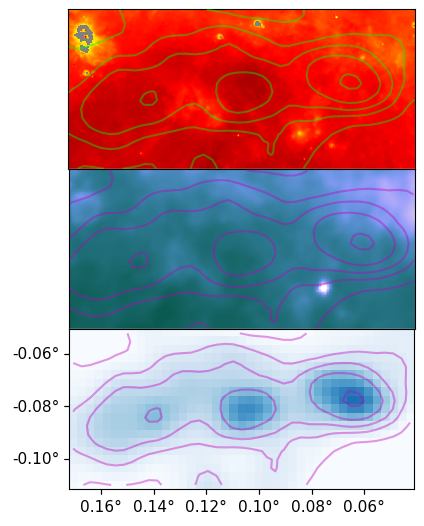

In [24]:
zoom_panels_3maps(0.105, -0.080, .13, .06)

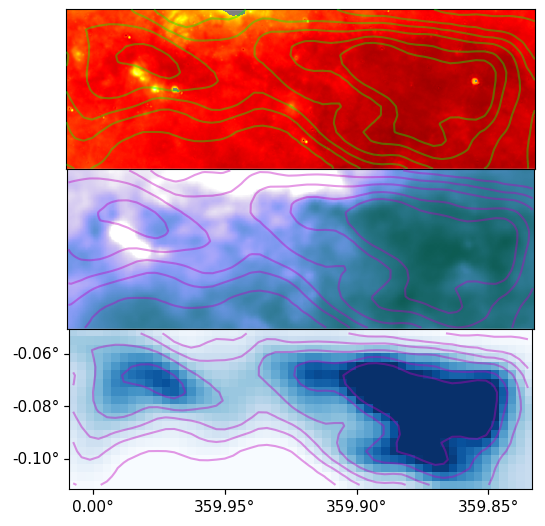

In [25]:
zoom_panels_3maps(-0.08, -0.081, .176, .06)

In [26]:
def zoom_panels(l, b, size_l, size_b):

    #Cutout2D essentially makes a new WCS header for the cutout 
    #that you can use to create a new FITS file for the smaller region!
    size = u.Quantity([size_b, size_l], u.deg) #sets the size of the box you're taking a cutout of
    spitz_cutout = Cutout2D(spitz_hdu_file.data, SkyCoord(l, b, unit="deg", frame='galactic'), 
                            size, wcs = WCS(spitz_hdu_file.header))




    plt.rcParams.update({'font.size': 11}) 


    fig, ax = plt.subplots(nrows=2, subplot_kw={'projection': spitz_cutout.wcs})
    plt.subplots_adjust(wspace=0, hspace=0)



    #Show the plot!
    #The vmin and vmax are the scaling limits. You can change these around to 
    #make the plot look better
    #cmap is the colormap. You can look up different matplotlib cmaps to make it look pretty :)
    ax[0].imshow(spitz_cutout.data, norm=LogNorm(vmin=54, vmax=6000), origin='lower', cmap = 'hot')

    #contour_cutout_brick = Cutout2D(hdu_big_contours.data, SkyCoord(0.255, 0.02, unit="deg", frame='galactic'), size, wcs = wcs)
    #axes1.contour(contour_cutout_brick.data, levels=np.logspace(-4.7, -3., 10), colors='m', alpha=0.5)



    lon = ax[0].coords[0]
    lat = ax[0].coords[1]

    lon.set_major_formatter('d.dd')
    lat.set_major_formatter('d.dd')
    ax[0].set_ylabel(' ', fontsize=0)
    ax[0].set_xlabel(' ', fontsize=0)
    #ax[0].tick_params(axis='x', labelsize=20)
    #ax[0].tick_params(axis='y', labelsize=20)
    lon.set_ticks_visible(False)
    lon.set_ticklabel_visible(False)
    lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)
    lon.set_axislabel('')
    lat.set_axislabel('')





    size = u.Quantity([size_b, size_l], u.deg) #sets the size of the box you're taking a cutout of
    hers_cutout = Cutout2D(hers_hdu_file.data, SkyCoord(l, b, unit="deg", frame='galactic'), 
                            size, wcs = WCS(hers_hdu_file.header))

    hers_cont_cutout = Cutout2D(hers_hdu_file_cont.data, SkyCoord(l, b, unit="deg", frame='galactic'), 
                            size, wcs = WCS(hers_hdu_file_cont.header))

    ax[1].remove()
    axs = fig.add_subplot(2,1,2, projection=hers_cutout.wcs)
    #Show the plot!
    #The vmin and vmax are the scaling limits. You can change these around to 
    #make the plot look better
    #cmap is the colormap. You can look up different matplotlib cmaps to make it look pretty :)
    axs.imshow(hers_cutout.data, vmin=3e22, vmax=2e23, origin='lower', cmap = 'Blues')


    
    
    ###Add Contours based on herschel column density 
    #ax[0].contour(hers_cutout.data, levels=np.logspace(22.5, 24, 8), colors='lime', alpha=0.4)
    cont_levels = [3e22,5e22,7e22,10e22,15e22,20e22]
    ax[0].contour(hers_cont_cutout.data, levels=cont_levels, colors='lime', alpha=0.4)
    axs.contour(hers_cutout.data, levels=cont_levels,colors='m', alpha=0.4)
    
    lon = axs.coords[0]
    lat = axs.coords[1]

    lon.set_major_formatter('d.dd')
    lat.set_major_formatter('d.dd')
    lon.set_axislabel(' ', fontsize=0)
    lat.set_axislabel(' ', fontsize=0)
    #axs.tick_params(axis='x', labelsize=20)
    #axs.tick_params(axis='y', labelsize=20)

    lon.set_ticks_position('b')
    lon.set_ticklabel_position('b')
    lon.set_axislabel_position('b')
    lat.set_ticks_position('l')
    lat.set_ticklabel_position('l')
    lat.set_axislabel_position('l')

    
    plt.tight_layout(pad=0.0)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig("./{}_{}_GLM_Hers_Zooms.pdf".format(l,b), bbox_inches='tight')

    plt.show()
    
    return 


In [27]:
np.logspace(22.5, 24, 8)

array([3.16227766e+22, 5.17947468e+22, 8.48342898e+22, 1.38949549e+23,
       2.27584593e+23, 3.72759372e+23, 6.10540230e+23, 1.00000000e+24])

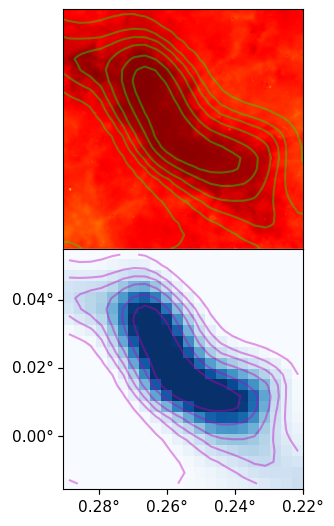

In [28]:
zoom_panels(0.255, 0.02, .07, .07)

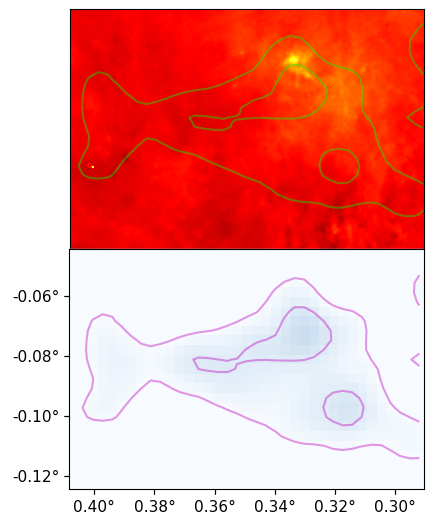

In [29]:
zoom_panels(0.348, -0.085, .118, .08)

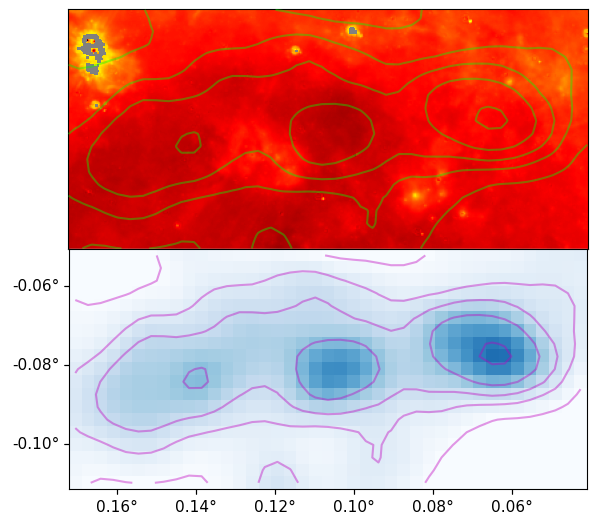

In [30]:
zoom_panels(0.105, -0.080, .13, .06)

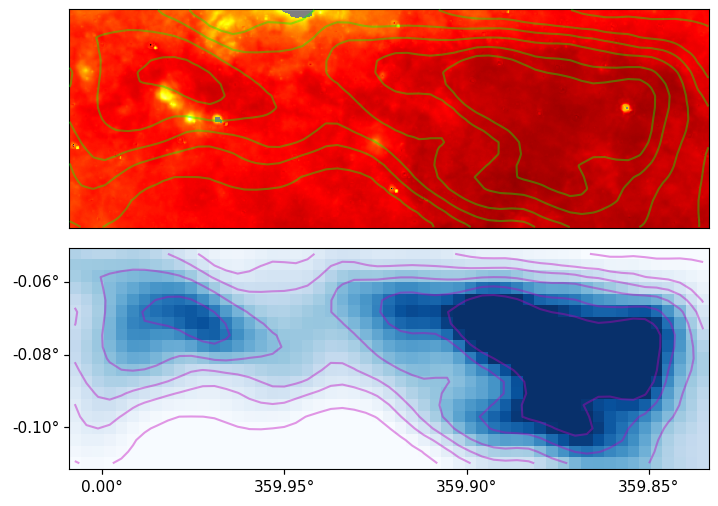

In [31]:
zoom_panels(-0.08, -0.081, .176, .06)

In [32]:
##Create circular radius in area with no clouds

# circle center
cen_x = 1300
cen_y = 877
rad = 150

cen_x_deg = 1.36
cen_y_deg = -0.05
rad_deg = 0.05

# Get image parameters
a = spitz_smoothed.shape[0]
b = spitz_smoothed.shape[1]

# Find radial distances
[X, Y] = np.meshgrid(np.arange(b) - cen_x, np.arange(a) - cen_y)
R = np.sqrt(np.square(X) + np.square(Y))

mosaic_circ_vals = spitz_smoothed[R<=rad]
mosaic_circ_index = np.where(R<=rad)



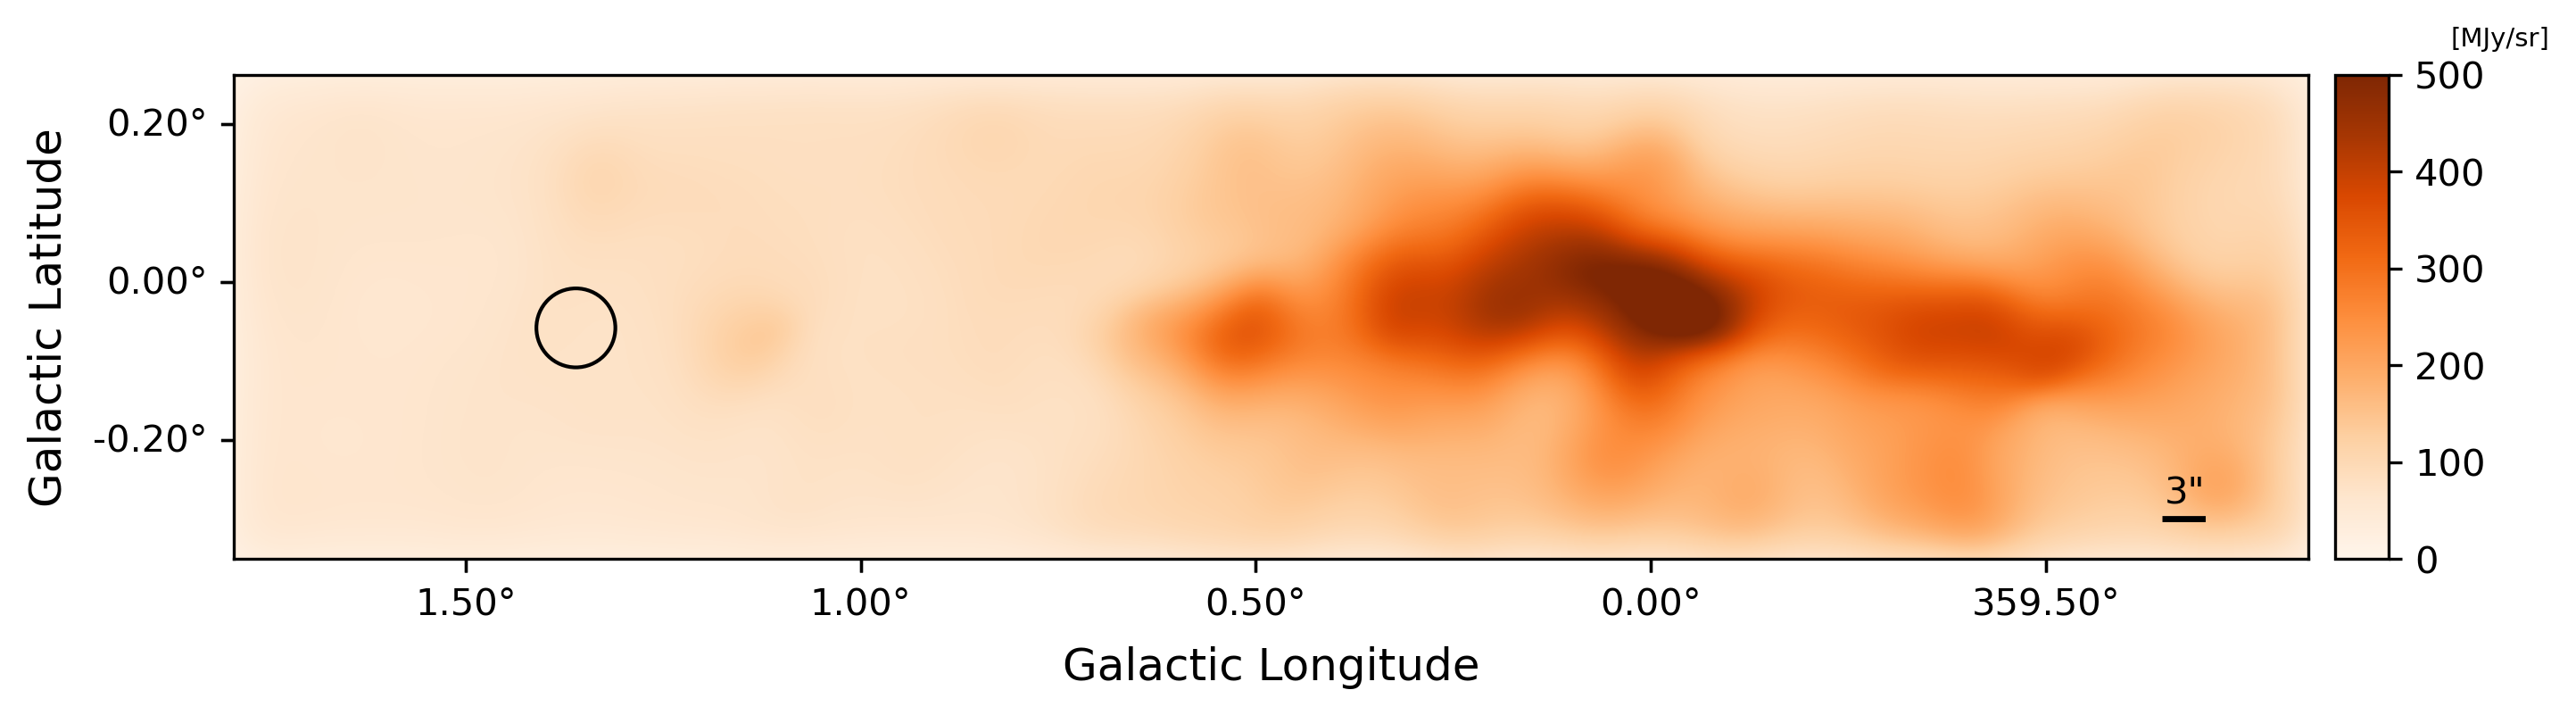

In [33]:
hdu_smoothed = pyfits.open('../../FITS/GLM_resid_I4_mosaic_cutout_FFT_smoothed_3arcmin_normed_kernel.fits')[0]
wcs = WCS(hdu_smoothed.header)

plt.rcParams.update({'font.size': 10}) 
fig = plt.figure( figsize=(10,3), dpi=300)
ax = plt.subplot(projection=wcs)

im_smoothed = ax.imshow(hdu_smoothed.data, vmin=0, vmax=500, origin='lower', cmap = 'Oranges')


plt.xlabel('Galactic Longitude', fontsize=12)
plt.ylabel('Galactic Latitude', fontsize=12)
#plt.title("Smoothed Mosaic", fontsize = 20)
#plt.colorbar(im, orientation='vertical')

# Create new axes according to image position
cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,
                    0.02,
                    ax.get_position().height])
 
# Plot vertical colorbar
cb = plt.colorbar(im_smoothed, cax=cax)
cb.set_label(label = r'[MJy/sr]',  y=1.1, rotation=0, fontsize = 7)


c = Circle((cen_x, cen_y), rad, edgecolor='k', facecolor='none')
ax.add_patch(c)




ax.arrow(359.3, -.3, 0.05, 0, 
         head_width=0, head_length=0, 
         fc='k', ec='k', width=0.003, 
         transform=ax.get_transform('galactic'))
plt.text(359.35, -.28, '3"',
         c='k', transform=ax.get_transform('galactic'))


#plt.tight_layout(w_pad = 10)
lon = ax.coords[0]
lat = ax.coords[1]

lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')
lon.set_ticks_position('b')
lon.set_ticklabel_position('b')
lon.set_axislabel_position('b')
lat.set_ticks_position('l')
lat.set_ticklabel_position('l')
lat.set_axislabel_position('l')

plt.savefig('smoothed_fig.pdf', dpi=100) # Saves Figure



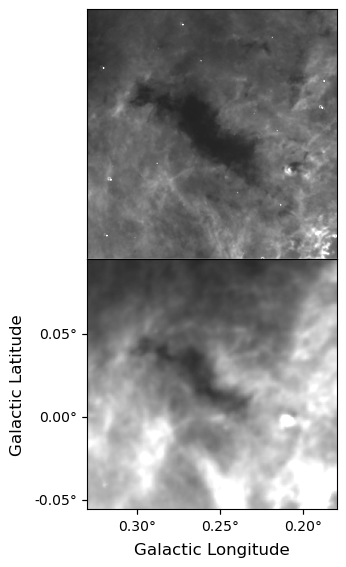

In [34]:
###Herschel 70um and 8um zooms###

hdu_spitz = fits.open('./GLM_8um.fits')[0]
hdu_hers70 = fits.open('../../FITS/destripe_l000_blue_wgls_rcal_cropped.fits')[0]






size = u.Quantity([.15, .15], u.deg)
cutout_brick_spitz = Cutout2D(hdu_spitz.data, SkyCoord(0.255, 0.02, unit="deg", frame='galactic'), 
                        size, wcs = WCS(hdu_spitz.header))




cutout_brick_70 = Cutout2D(hdu_hers70.data, SkyCoord(0.255, 0.02, unit="deg", frame='galactic'), 
                        size, wcs =WCS(hdu_hers70.header))



fig, ax = plt.subplots(nrows=2, subplot_kw={'projection': cutout_brick_spitz.wcs}, figsize = (5,5))

ax[0].imshow(cutout_brick_spitz.data, vmin=0, vmax=950, origin='lower', cmap = 'gist_gray')


lon = ax[0].coords['glon']
lat = ax[0].coords['glat']
ax[0].set_ylabel(' ', fontsize=0)
ax[0].set_xlabel(' ', fontsize=0)
#ax[0].tick_params(axis='x', labelsize=20)
#ax[0].tick_params(axis='y', labelsize=20)
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')


ax[1].remove()
axs = fig.add_subplot(2,1,2, projection=cutout_brick_70.wcs)

axs.imshow(cutout_brick_70.data, vmin=2000, vmax=27000, origin='lower', cmap = 'gist_gray')




lon70 = axs.coords[0]
lat70 = axs.coords[1]
lon70.set_major_formatter('d.dd')
lat70.set_major_formatter('d.dd')


axs.set_ylabel('Galactic Latitude', fontsize=12)
axs.set_xlabel('Galactic Longitude', fontsize=12)
#ax[0].tick_params(axis='x', labelsize=20)
#ax[0].tick_params(axis='y', labelsize=20)


lon70.set_ticks_position('b')
lon70.set_ticklabel_position('b')
lon70.set_axislabel_position('b')
lat70.set_ticks_position('l')
lat70.set_ticklabel_position('l')
lat70.set_axislabel_position('l')


plt.tight_layout(pad=0.0)
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("brick_spitz_70_comparison.png", bbox_inches='tight')



In [35]:
plot_cloud_id = np.arange(1,37,1)
plot_cloud_id = np.reshape(plot_cloud_id,(6,6))

plot_cloud_id

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]])

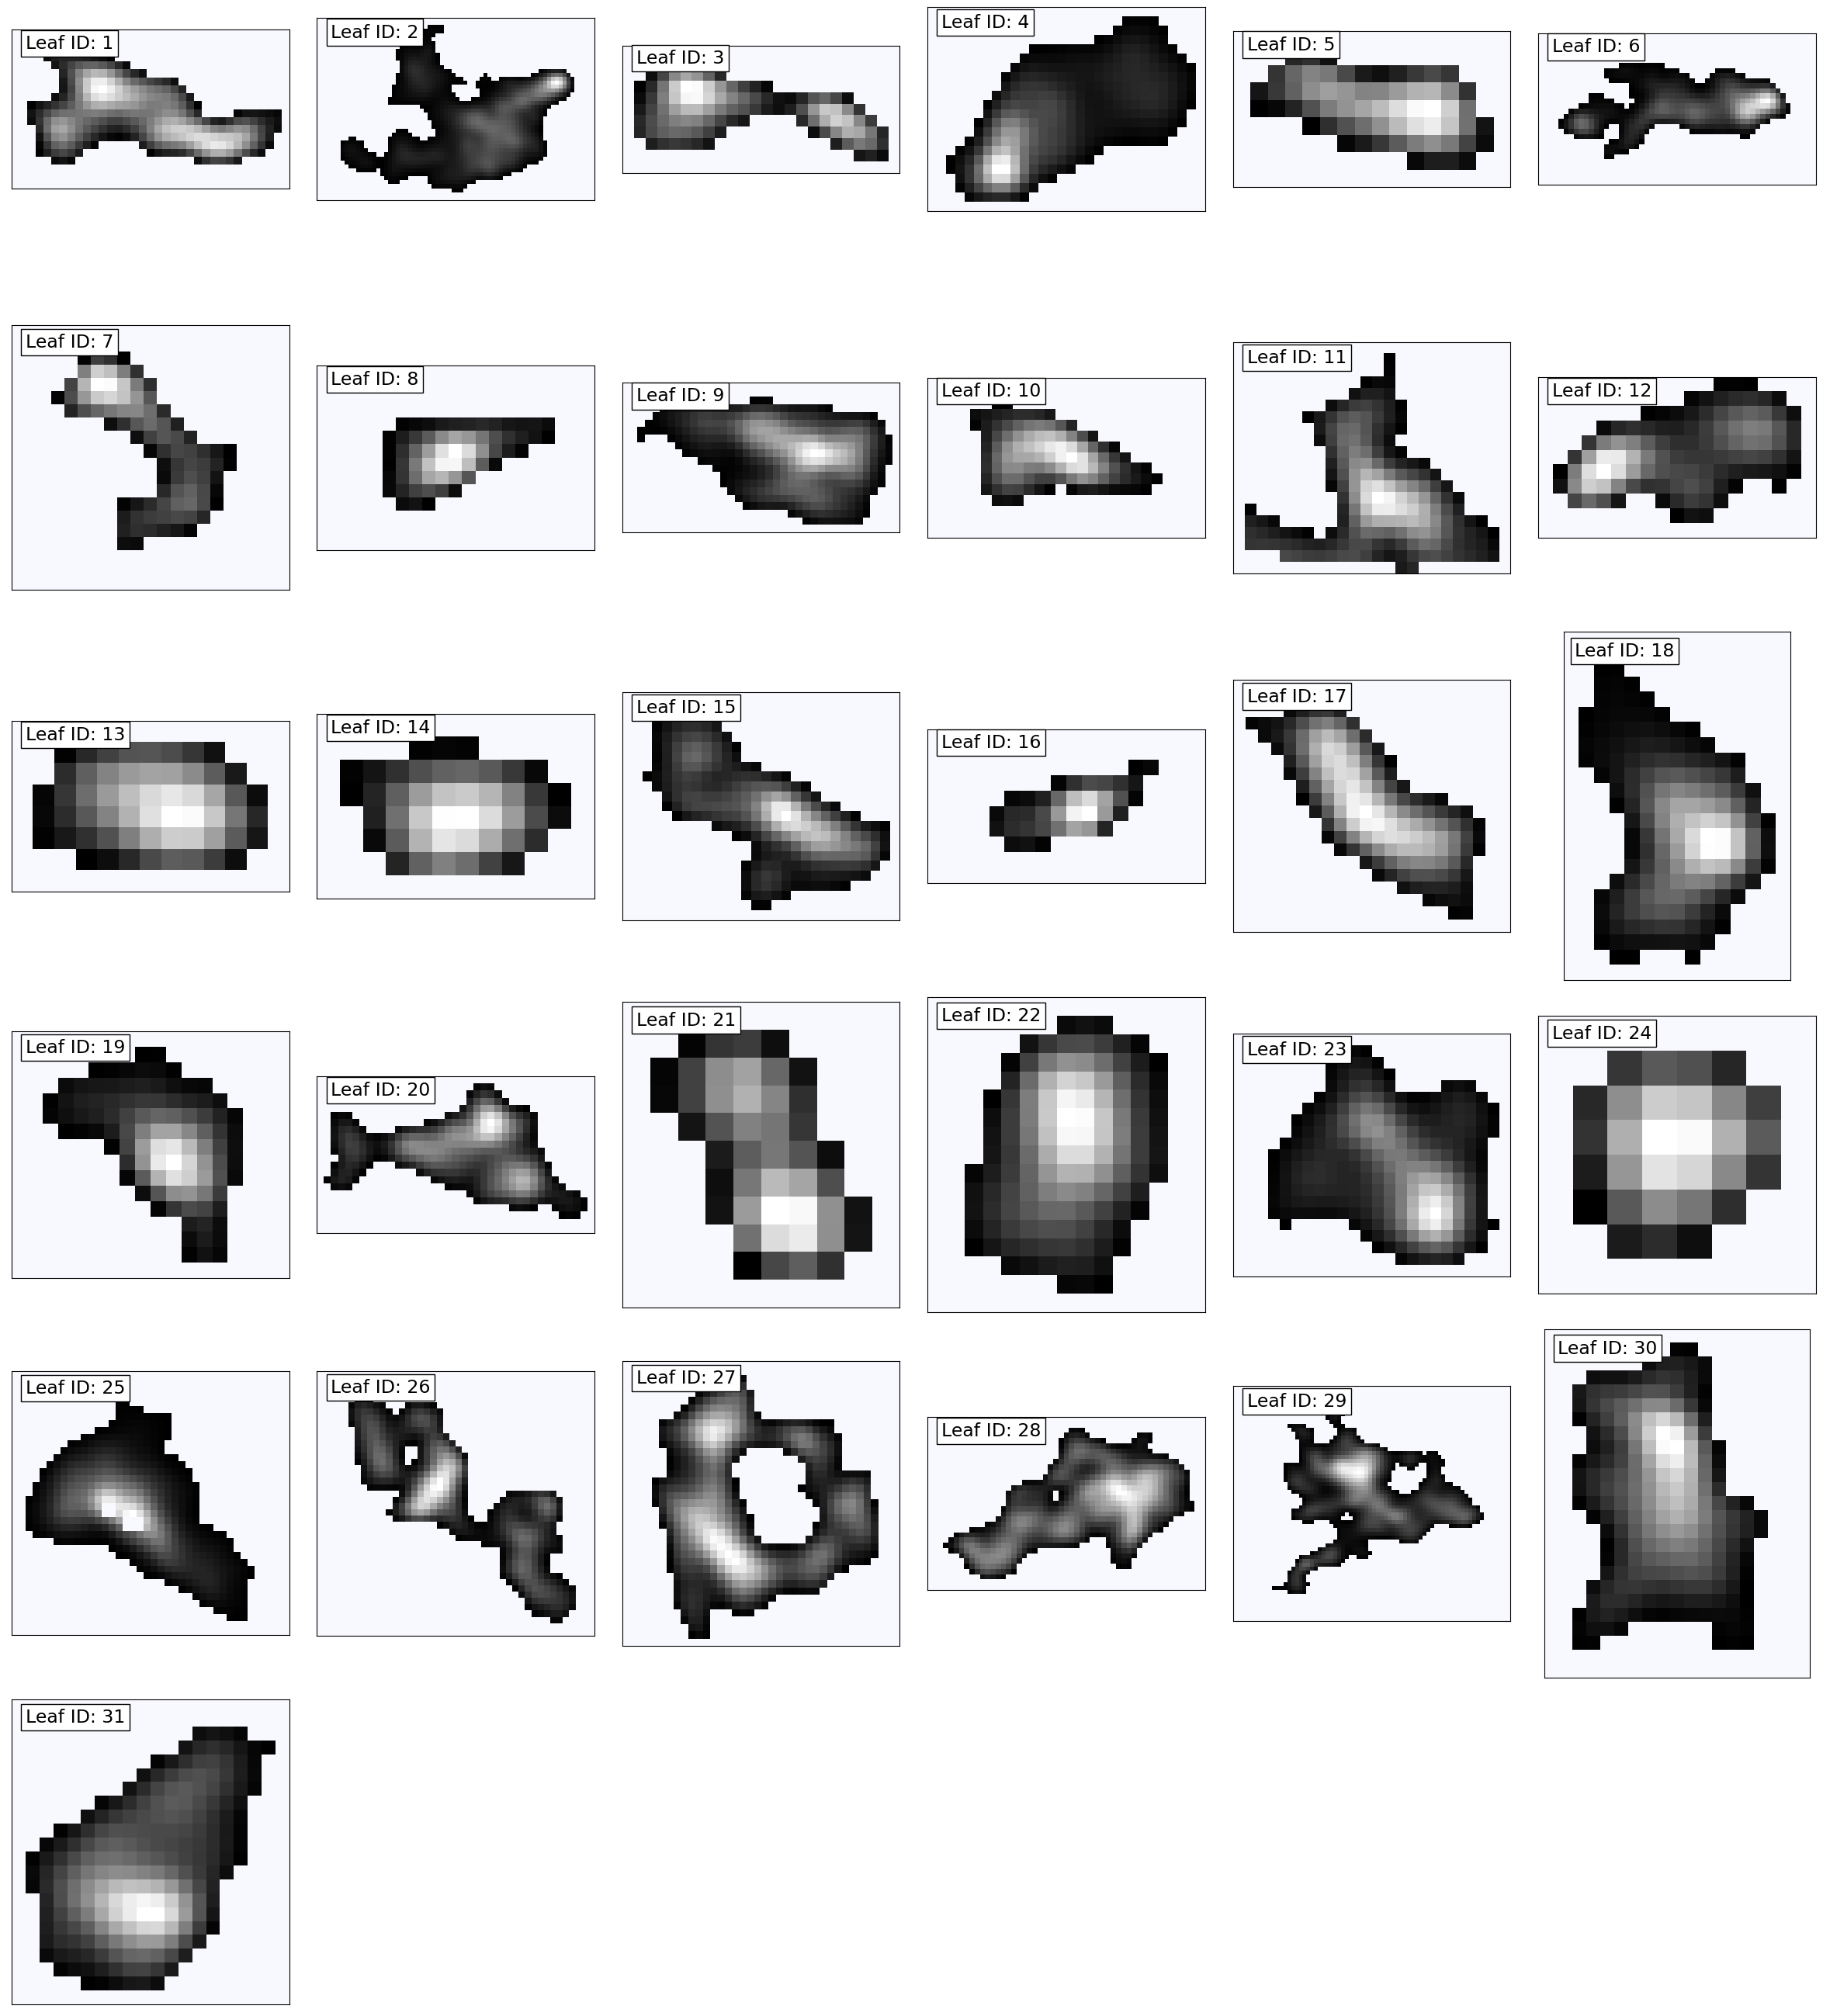

In [36]:
###ALL CLOUDS HERSCHEL MAPS###


plot_cloud_list = [ ["G359.475-0.044", "G359.508-0.135", "G359.561-0.001"], 
                   ["G359.595-0.223","G359.608+0.018", "G359.688-0.132"], 
                   ["G359.701+0.032", "G359.865+0.023", "G359.88-0.081"],
                   ["G359.979-0.071", "G0.014-0.016","G0.035+0.032" ], 
                   ["G0.068-0.076", "G0.105-0.08", "G0.116+0.003" ], 
                   ["G0.143-0.083", "G0.255+0.02", "G0.327-0.195"],
                   ["G0.342+0.06",  "G0.342-0.085", "G0.379+0.05" ], 
                   ["G0.413+0.048", "G0.488+0.008", "G0.645+0.03"],
                   ["G0.666-0.028", "G0.716-0.09", "G0.816-0.185" ], 
                   ["G0.888-0.044", "G1.075-0.049" ,"G1.601+0.012"],  
                   ["G1.652-0.052" ,"G1.652-0.052" ,"G1.652-0.052" ],
                  ["G1.652-0.052" ,"G1.652-0.052" ,"G1.652-0.052"] ]



plot_cloud_list = np.reshape(plot_cloud_list,(6,6))

f_fore=0.5

fig, ax = plt.subplots(6, 6, figsize = (30,35))
fig.delaxes(ax[5,5])
fig.delaxes(ax[5,4])
fig.delaxes(ax[5,3])
fig.delaxes(ax[5,2])
fig.delaxes(ax[5,1])
plt.subplots_adjust(wspace=0.1, hspace=0)
#plt.xlim(0,30)
#plt.ylim(0,30)

plt.rcParams.update({'font.size': 20})

for i in range(6):
    for j in range(6):
        
 

        regrid_to_nans_file = '../../Cloud_masks/{}/{}_ExtN8um_ffore{:.2f}_cutout_smoothed_conv36_regrid_isolated.fits'.format(plot_cloud_list[i][j], plot_cloud_list[i][j], f_fore)

        regrid_to_nans_data = pyfits.open(regrid_to_nans_file)[0].data

        cloud_hers = '../../Cloud_masks/{}/{}_herschel_cutout_isolated.fits'.format(plot_cloud_list[i][j],plot_cloud_list[i][j])
        cloud_hers_data = pyfits.open(cloud_hers)[0].data

        wcs = WCS(pyfits.open(regrid_to_nans_file)[0].header)



        plt.rcParams.update({'font.size': 17})
    
        ax[i,j].imshow(cloud_hers_data, cmap='gist_gray', aspect='equal', origin='lower')
        ax[i,j].set_facecolor('ghostwhite')
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
        #plt.legend(loc=2)
        ax[i,j].text(.05, .97, 'Leaf ID: {}'.format(plot_cloud_id[i][j]), ha='left', va='top', transform=ax[i,j].transAxes, bbox=dict(facecolor='white', edgecolor='k', alpha=1))




plt.savefig('./all_clouds_herschel.png')



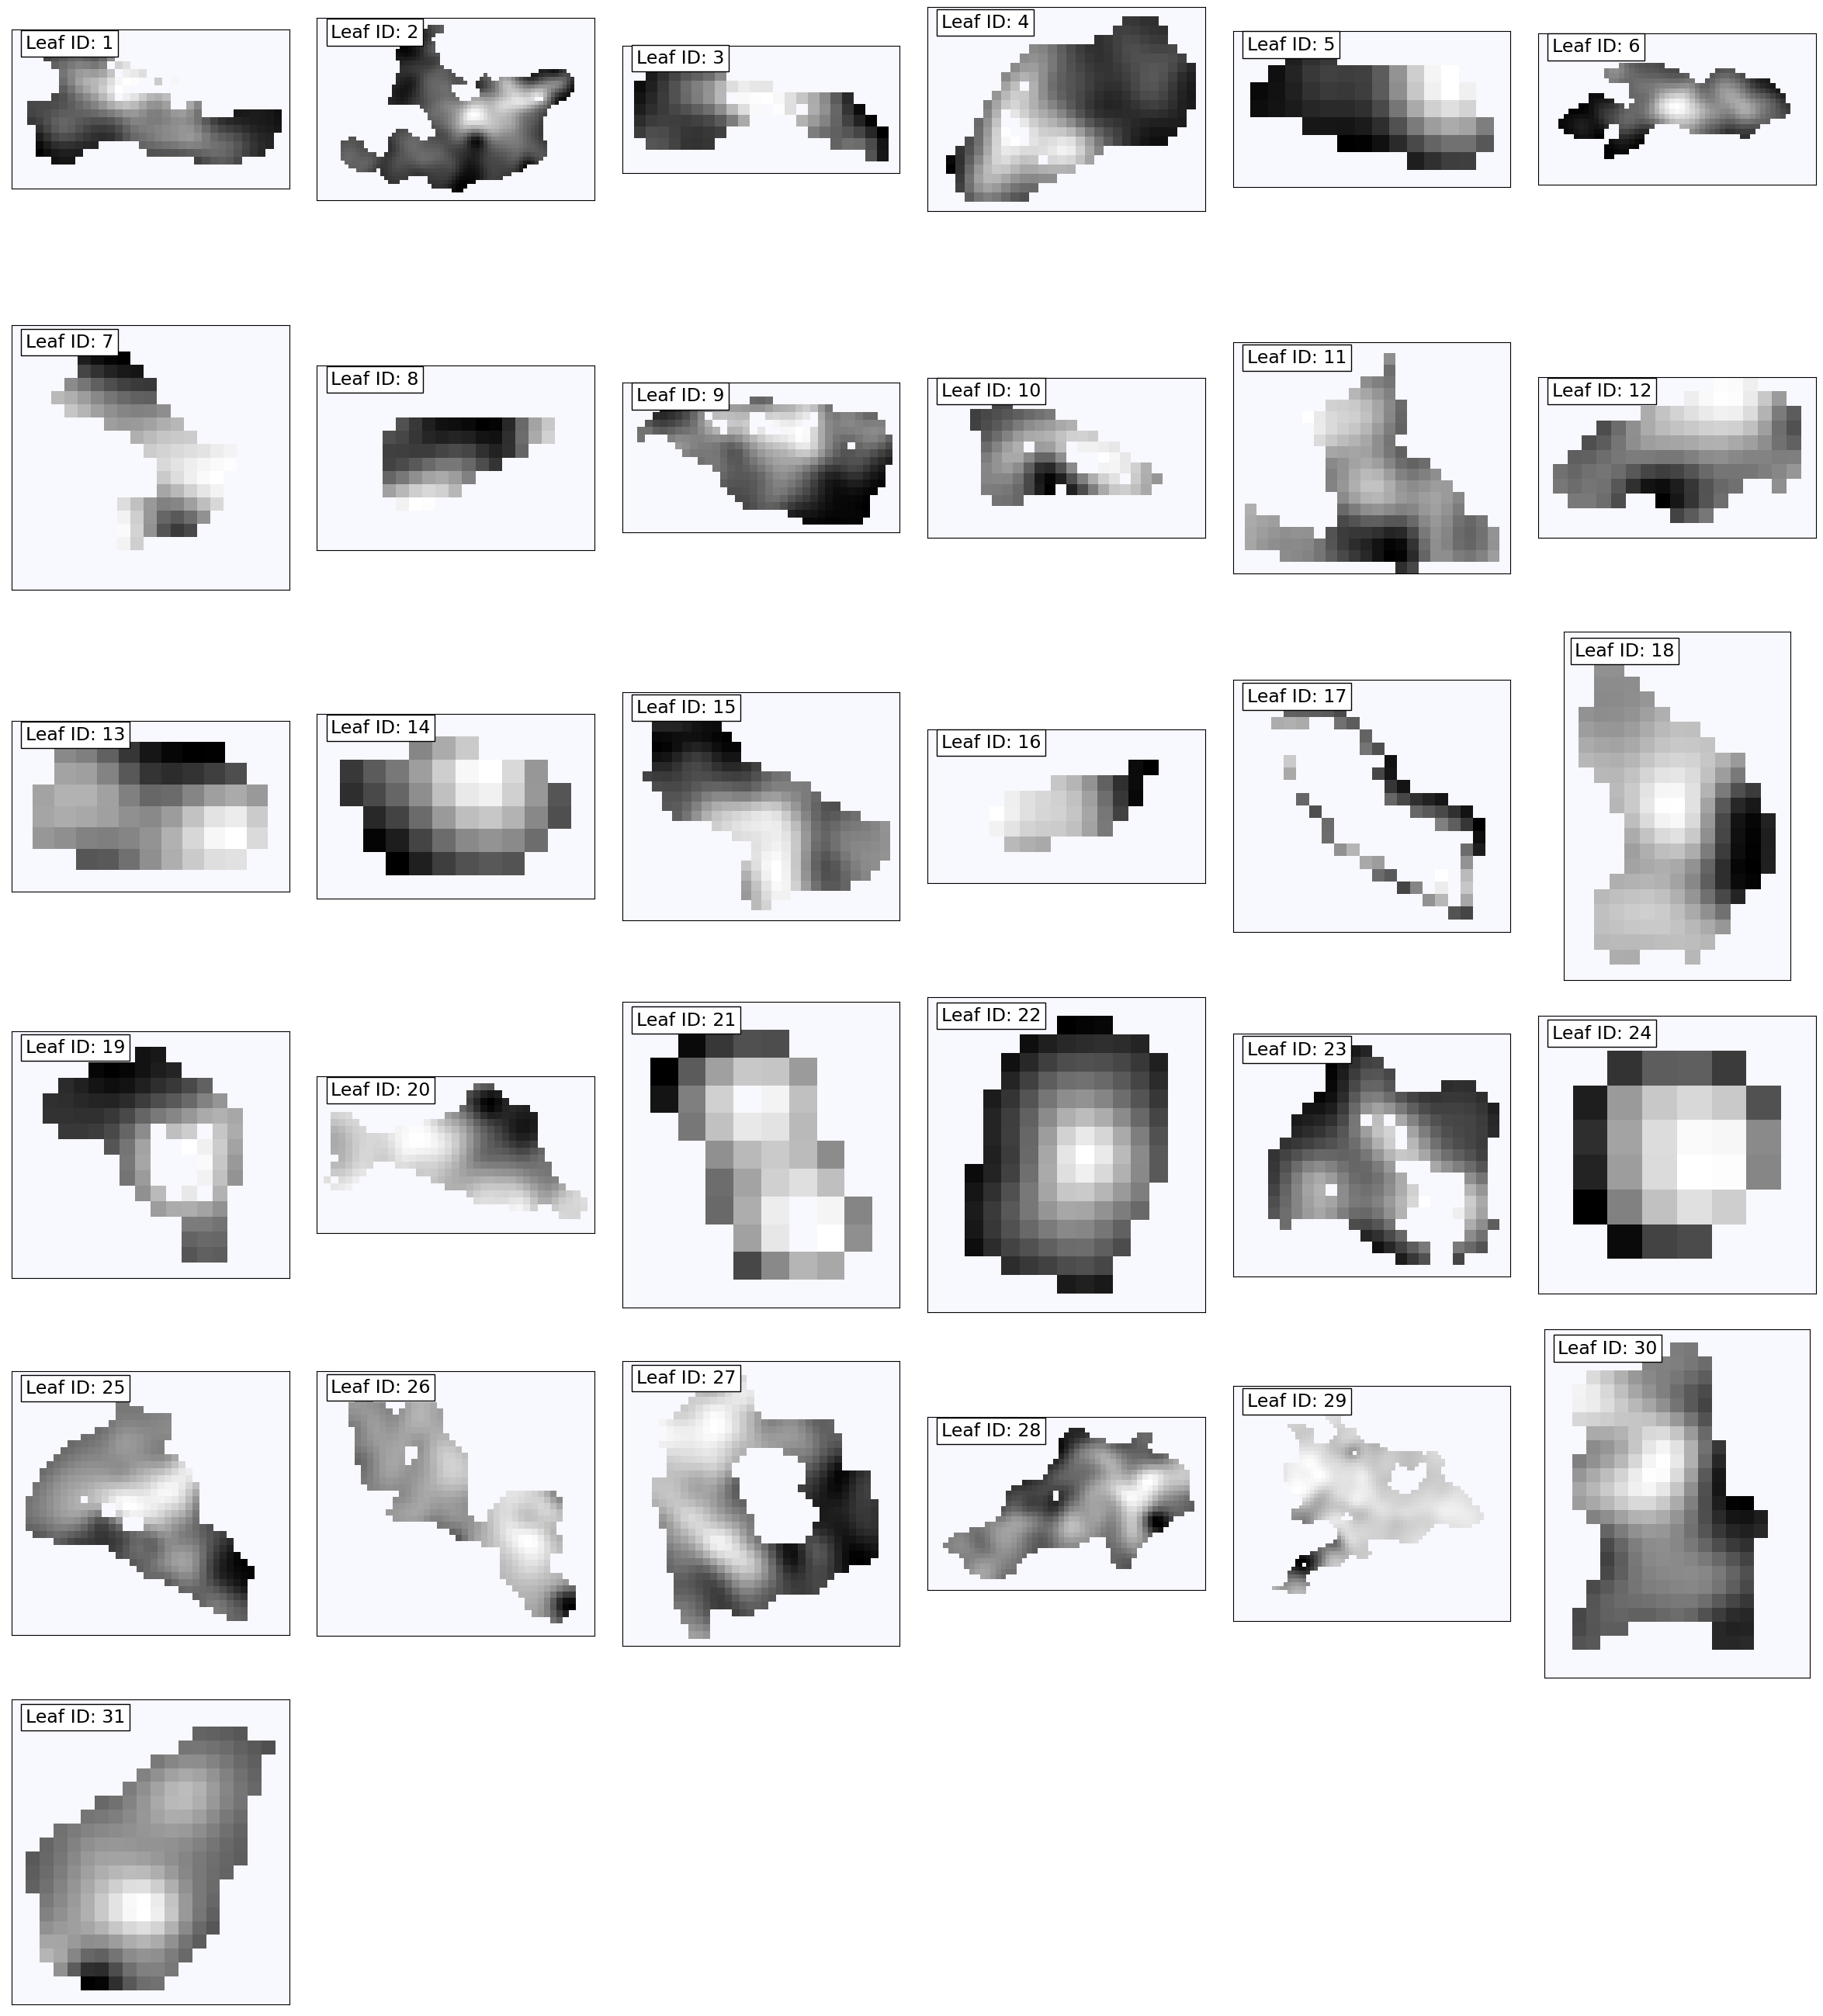

In [37]:
###ALL SPITZER 8um COL DEN MAPS####

plot_cloud_list = [ ["G359.475-0.044", "G359.508-0.135", "G359.561-0.001"], 
                   ["G359.595-0.223","G359.608+0.018", "G359.688-0.132"], 
                   ["G359.701+0.032", "G359.865+0.023", "G359.88-0.081"],
                   ["G359.979-0.071", "G0.014-0.016","G0.035+0.032" ], 
                   ["G0.068-0.076", "G0.105-0.08", "G0.116+0.003" ], 
                   ["G0.143-0.083", "G0.255+0.02", "G0.327-0.195"],
                   ["G0.342+0.06",  "G0.342-0.085", "G0.379+0.05" ], 
                   ["G0.413+0.048", "G0.488+0.008", "G0.645+0.03"],
                   ["G0.666-0.028", "G0.716-0.09", "G0.816-0.185" ], 
                   ["G0.888-0.044", "G1.075-0.049" ,"G1.601+0.012"],  
                   ["G1.652-0.052" ,"G1.652-0.052" ,"G1.652-0.052" ],
                  ["G1.652-0.052" ,"G1.652-0.052" ,"G1.652-0.052"] ]

plot_cloud_list = np.reshape(plot_cloud_list,(6,6))

f_fore=0.5

fig, ax = plt.subplots(6, 6, figsize = (30,35))
fig.delaxes(ax[5,5])
fig.delaxes(ax[5,4])
fig.delaxes(ax[5,3])
fig.delaxes(ax[5,2])
fig.delaxes(ax[5,1])
plt.subplots_adjust(wspace=0.1, hspace=0)
#plt.xlim(0,30)
#plt.ylim(0,30)

plt.rcParams.update({'font.size': 20})

for i in range(6):
    for j in range(6):
 

        regrid_to_nans_file = '../../Cloud_masks/{}/{}_ExtN8um_ffore{:.2f}_cutout_smoothed_conv36_regrid_isolated.fits'.format(plot_cloud_list[i][j], plot_cloud_list[i][j], f_fore)

        regrid_to_nans_data = pyfits.open(regrid_to_nans_file)[0].data

        cloud_hers = '../../Cloud_masks/{}/{}_herschel_cutout_isolated.fits'.format(plot_cloud_list[i][j],plot_cloud_list[i][j])
        cloud_hers_data = pyfits.open(cloud_hers)[0].data

        wcs = WCS(pyfits.open(regrid_to_nans_file)[0].header)




        plt.rcParams.update({'font.size': 17})
    
        ax[i,j].imshow(regrid_to_nans_data, cmap='gist_gray', aspect='equal',origin='lower')
        ax[i,j].set_facecolor('ghostwhite')
        
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        #plt.legend(loc=2)
        ax[i,j].text(.05, .97, 'Leaf ID: {}'.format(plot_cloud_id[i][j]), ha='left', va='top', transform=ax[i,j].transAxes, bbox=dict(facecolor='white', edgecolor='k', alpha=1))


plt.savefig('./all_clouds_8umExtN.png')

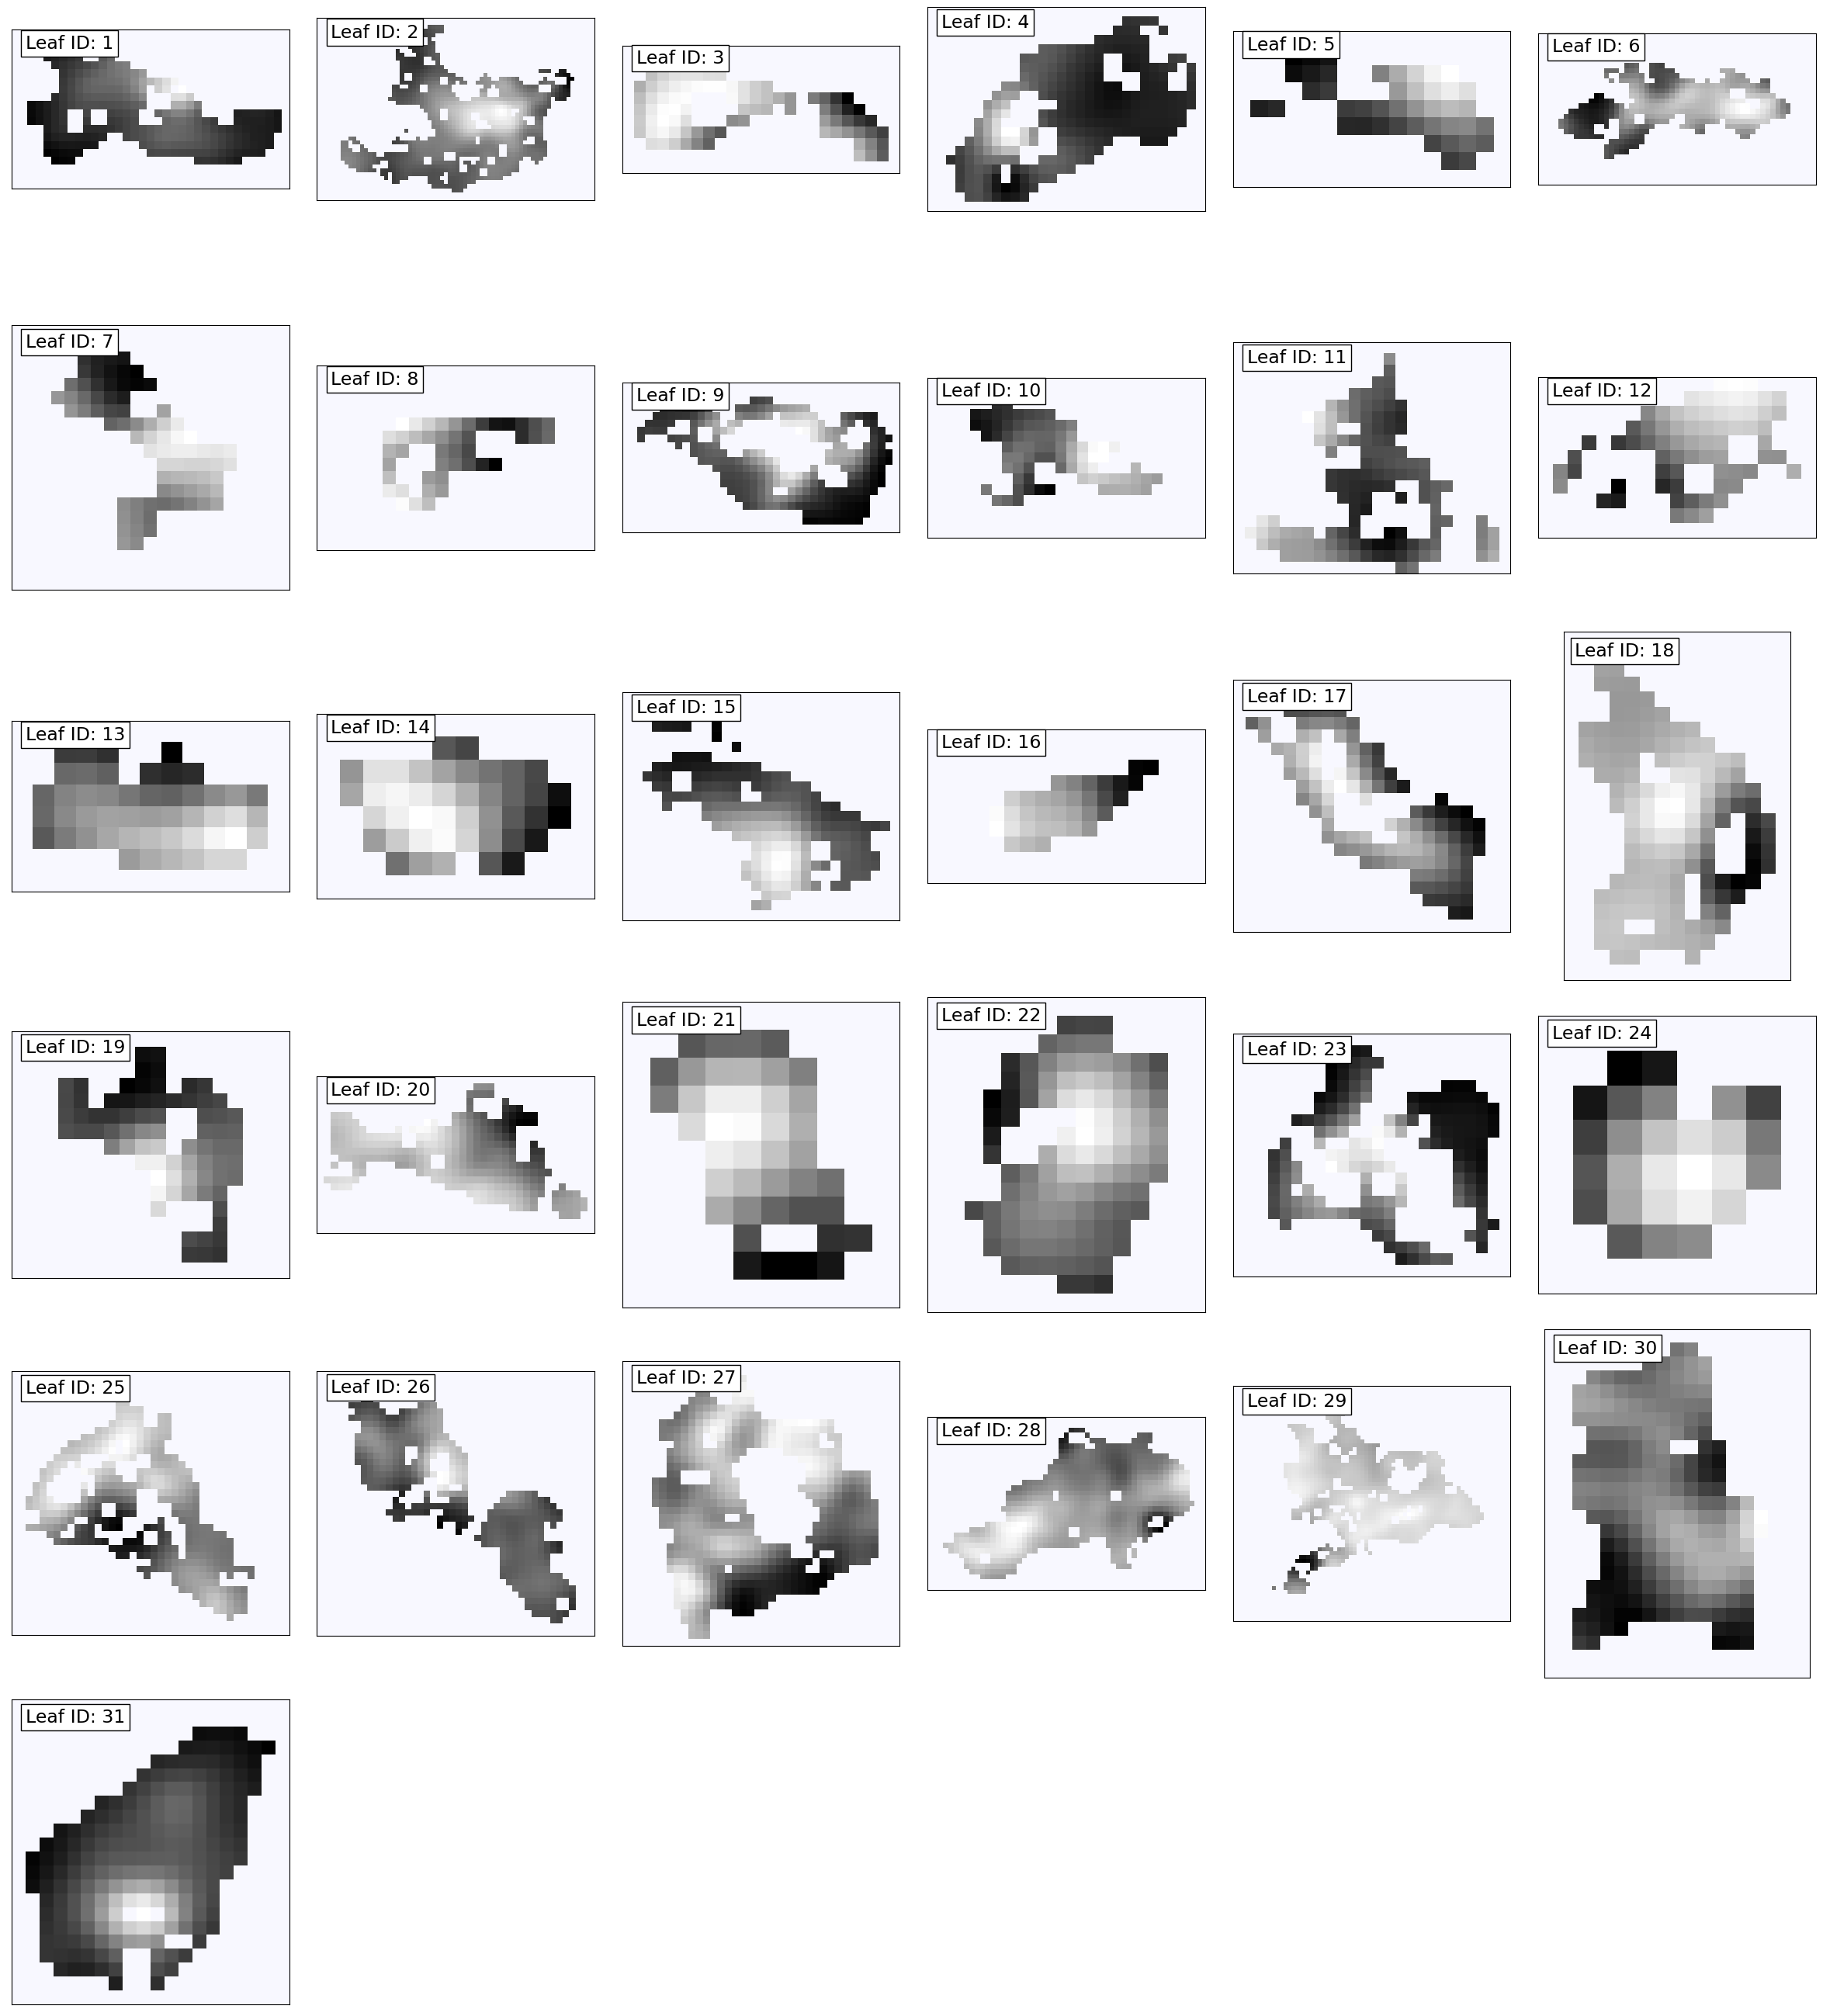

In [38]:
###ALL 70um COL DEN MAPS####

plot_cloud_list = [ ["G359.475-0.044", "G359.508-0.135", "G359.561-0.001"], 
                   ["G359.595-0.223","G359.608+0.018", "G359.688-0.132"], 
                   ["G359.701+0.032", "G359.865+0.023", "G359.88-0.081"],
                   ["G359.979-0.071", "G0.014-0.016","G0.035+0.032" ], 
                   ["G0.068-0.076", "G0.105-0.08", "G0.116+0.003" ], 
                   ["G0.143-0.083", "G0.255+0.02", "G0.327-0.195"],
                   ["G0.342+0.06",  "G0.342-0.085", "G0.379+0.05" ], 
                   ["G0.413+0.048", "G0.488+0.008", "G0.645+0.03"],
                   ["G0.666-0.028", "G0.716-0.09", "G0.816-0.185" ], 
                   ["G0.888-0.044", "G1.075-0.049" ,"G1.601+0.012"],  
                   ["G1.652-0.052" ,"G1.652-0.052" ,"G1.652-0.052" ],
                  ["G1.652-0.052" ,"G1.652-0.052" ,"G1.652-0.052"] ]

plot_cloud_list = np.reshape(plot_cloud_list,(6,6))

f_fore=0.5

fig, ax = plt.subplots(6, 6, figsize = (30,35))
fig.delaxes(ax[5,5])
fig.delaxes(ax[5,4])
fig.delaxes(ax[5,3])
fig.delaxes(ax[5,2])
fig.delaxes(ax[5,1])
plt.subplots_adjust(wspace=0.1, hspace=0)
#plt.xlim(0,30)
#plt.ylim(0,30)

plt.rcParams.update({'font.size': 20})

for i in range(6):
    for j in range(6):
 

        regrid_to_nans_file = '../../Cloud_masks/{}/{}_ExtN70um_sources_to_nans_ffore{:.2f}_cutout_smoothed_conv36_regrid_isolated.fits'.format(plot_cloud_list[i][j], plot_cloud_list[i][j], f_fore)

        regrid_to_nans_data = pyfits.open(regrid_to_nans_file)[0].data

        cloud_hers = '../../Cloud_masks/{}/{}_herschel_cutout_isolated.fits'.format(plot_cloud_list[i][j],plot_cloud_list[i][j])
        cloud_hers_data = pyfits.open(cloud_hers)[0].data

        wcs = WCS(pyfits.open(regrid_to_nans_file)[0].header)




        plt.rcParams.update({'font.size': 17})
    
        ax[i,j].imshow(regrid_to_nans_data, cmap='gist_gray', aspect='equal',origin='lower')
        ax[i,j].set_facecolor('ghostwhite')
        
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        #plt.legend(loc=2)
        ax[i,j].text(.05, .97, 'Leaf ID: {}'.format(plot_cloud_id[i][j]), ha='left', va='top', transform=ax[i,j].transAxes, bbox=dict(facecolor='white', edgecolor='k', alpha=1))


plt.savefig('./all_clouds_70umExtN.png')

In [39]:
###Edit Mega Table for Paper###


cat = Table.read('../../LBV_plots_stuff/CMZ_cloud_catalogue_data.tex')
cat

<Table length=47>
index   cloud_name      l       b      v   sigma   rad   absorp r_p_mom0 r_s_mom0 ... flux_ratio_mom0 I_cloud_max I_model_max flux_diff_max flux_ratio_max ext_frac_max lb_pixel_mask NF_decision min_flux_max
 str3     str14      float64 float64 int64 int64 float64 int64  float64  float64  ...     float64       float64     float64      float64       float64       float64        int64         str3      float64   
----- -------------- ------- ------- ----- ----- ------- ------ -------- -------- ... --------------- ----------- ----------- ------------- -------------- ------------ ------------- ----------- ------------
    1 G359.475-0.044  -0.525  -0.044  -102     6     4.3      3    0.261    0.444 ...           0.506     212.667     317.106        31.669          0.506        0.992             1          LN       82.971
    2 G359.508-0.135  -0.492  -0.135   -56     9     8.7      3    0.384    0.397 ...           0.623     224.209     276.371       -20.608          0.623        0.815             1           N      117.934
    3 G359.561-0.001  -0.439  -0.001   -90     8     2.7      0    0.222    0.325 ...           0.551     197.054      263.15        -6.674          0.551        0.997             1           U      106.365
   4a G359.595-0.223  -0.405  -0.223   -27    13     4.6      3    0.468    0.257 ...           0.569     180.619     232.561       -26.881          0.567        0.947             1           N      100.903
   4b G359.595-0.223  -0.405  -0.223   -20     8     4.6      3    0.316    0.329 ...           0.517     178.699     234.446       -25.555          0.559        0.932             0          LN      100.903
    5 G359.608+0.018  -0.392   0.018   -78     5     2.0      1    0.183    0.262 ...           0.575     185.012     230.972        -26.81          0.575        0.997             1          LN      123.728
   6a G359.688-0.132  -0.312  -0.132   -29     5     5.6      0    0.655    0.694 ...           0.565     209.379     285.681         0.229           0.56        0.995             0          LN      153.898
   6b G359.688-0.132  -0.312  -0.132   -21    12     5.6      0    0.301    0.282 ...           0.579      202.07     259.951        -9.201          0.576        0.993             1           U      151.445
   7a G359.701+0.032  -0.299   0.032   -73    11     2.4      1    -0.53   -0.417 ...           0.658     205.206     233.126       -44.223          0.655        0.776             1          LN      154.551
   7b G359.701+0.032  -0.299   0.032   -37     5     2.4      1      nan      nan ...           0.746     213.061     255.086       -39.161          0.648        0.783             0           U      155.592
   8a G359.865+0.023  -0.135   0.023   -54     9     2.0      2   -0.107    -0.21 ...            0.82      312.12     325.378       -61.153          0.802        0.585             1           F      197.792
   8b G359.865+0.023  -0.135   0.023   -15    15     2.0      2     -1.0     -1.0 ...           0.937     336.889     305.122      -104.092          0.933         0.16             0           F      233.664
   8c G359.865+0.023  -0.135   0.023    62     6     2.0      2   -0.769    -0.86 ...           0.935     342.501     310.059      -104.551          0.934        0.213             0           F      197.792
    9  G359.88-0.081   -0.12  -0.081    15    12     5.0      1      0.6    0.588 ...           0.454      195.59     315.944        47.584          0.454        0.996             1          LN      126.201
   10 G359.979-0.071  -0.021  -0.071    48    11     2.7      1    0.264    0.265 ...           0.549     314.437     478.218        91.011          0.549        0.918             1          LN       161.22
  ...            ...     ...     ...   ...   ...     ...    ...      ...      ... ...             ...         ...         ...           ...            ...          ...           ...         ...          ...
   22   G0.413+0.048   0.413   0.048    19    11 

In [40]:

cat.keep_columns(['index','l','b','v', 'flux_diff_max','flux_ratio_max','r_p_max', 'I_cloud_max', 'I_model_max', 'ext_frac_max','NF_decision','min_flux_max'])

In [41]:
cat

<Table length=47>
index    l       b      v   r_p_max I_cloud_max I_model_max flux_diff_max flux_ratio_max ext_frac_max NF_decision min_flux_max
 str3 float64 float64 int64 float64   float64     float64      float64       float64       float64        str3      float64   
----- ------- ------- ----- ------- ----------- ----------- ------------- -------------- ------------ ----------- ------------
    1  -0.525  -0.044  -102   0.261     212.667     317.106        31.669          0.506        0.992          LN       82.971
    2  -0.492  -0.135   -56   0.384     224.209     276.371       -20.608          0.623        0.815           N      117.934
    3  -0.439  -0.001   -90   0.222     197.054      263.15        -6.674          0.551        0.997           U      106.365
   4a  -0.405  -0.223   -27   0.433     180.619     232.561       -26.881          0.567        0.947           N      100.903
   4b  -0.405  -0.223   -20   0.262     178.699     234.446       -25.555          0.559        0.932          LN      100.903
    5  -0.392   0.018   -78   0.183     185.012     230.972        -26.81          0.575        0.997          LN      123.728
   6a  -0.312  -0.132   -29   0.621     209.379     285.681         0.229           0.56        0.995          LN      153.898
   6b  -0.312  -0.132   -21   0.281      202.07     259.951        -9.201          0.576        0.993           U      151.445
   7a  -0.299   0.032   -73  -0.535     205.206     233.126       -44.223          0.655        0.776          LN      154.551
   7b  -0.299   0.032   -37   -0.62     213.061     255.086       -39.161          0.648        0.783           U      155.592
   8a  -0.135   0.023   -54  -0.049      312.12     325.378       -61.153          0.802        0.585           F      197.792
   8b  -0.135   0.023   -15     nan     336.889     305.122      -104.092          0.933         0.16           F      233.664
   8c  -0.135   0.023    62  -0.643     342.501     310.059      -104.551          0.934        0.213           F      197.792
    9   -0.12  -0.081    15     0.6      195.59     315.944        47.584          0.454        0.996          LN      126.201
   10  -0.021  -0.071    48   0.264     314.437     478.218        91.011          0.549        0.918          LN       161.22
  ...     ...     ...   ...     ...         ...         ...           ...            ...          ...         ...          ...
   22   0.413   0.048    19   0.838     114.224     190.317         3.323          0.326          1.0           N       59.849
   23   0.488   0.008    28   0.645     111.192     197.491        13.529          0.299        0.999           N        49.44
   24   0.645    0.03    53   0.615      71.228      99.077       -44.921          0.193          1.0           N       45.608
   25   0.666  -0.028    62  -0.332      74.039     121.164       -25.644          0.181        0.933           U       38.643
  26a   0.716   -0.09    28   0.316      78.144     106.837       -48.387          0.256        0.953          LN        45.35
  26b   0.716   -0.09    58   0.425      73.849       93.39       -52.731           0.23        0.985          LN        42.91
   27   0.816  -0.185    39   0.098      66.862      75.244       -64.389          0.196        0.929         nan       41.467
  28a   0.888  -0.044    14  -0.938      76.412      87.104       -62.202          0.279        0.994         nan       50.842
  28b   0.888  -0.044    26  -0.938      76.412      87.104       -62.202          0.279        0.994         nan       50.842
  28c   0.888  -0.044    84   0.044      72.609      84.803       -61.107          0.243        0.984         nan       44.973
  29a   1.075  -0.049    74  -0.232     144.496     105.386      -111.218          0.872        0.142         nan       61.725
  29b   1.075  -0.049    85  -0.012      84.019      93.974        -63.43          0.327        0.797         nan       40.377
  30a   1.601   0.012    48   0.336      51.5

In [42]:
cat['I_cloud_max'].format = '%.2f' 
cat['I_model_max'].format = '%.2f'
cat['flux_diff_max'].format = '%.2f'
cat['flux_ratio_max'].format = '%.2f' 
cat['ext_frac_max'].format = '%.2f'
cat['r_p_max'].format = '%.2f' 
cat['min_flux_max'].format = '%.2f' 



cat_paper_table = Table([cat['index'], cat['l'], cat['b'], cat['v'], 
                         cat['I_cloud_max'], cat['I_model_max'], cat['min_flux_max'], 
                         cat['flux_diff_max'],cat['flux_ratio_max'], cat['ext_frac_max'],
                         cat['r_p_max'], 
                         cat['NF_decision']    

                        ])

In [43]:
cat_paper_table

<Table length=47>
index    l       b      v   I_cloud_max I_model_max min_flux_max flux_diff_max flux_ratio_max ext_frac_max r_p_max NF_decision
 str3 float64 float64 int64   float64     float64     float64       float64       float64       float64    float64     str3   
----- ------- ------- ----- ----------- ----------- ------------ ------------- -------------- ------------ ------- -----------
    1  -0.525  -0.044  -102      212.67      317.11        82.97         31.67           0.51         0.99    0.26          LN
    2  -0.492  -0.135   -56      224.21      276.37       117.93        -20.61           0.62         0.81    0.38           N
    3  -0.439  -0.001   -90      197.05      263.15       106.36         -6.67           0.55         1.00    0.22           U
   4a  -0.405  -0.223   -27      180.62      232.56       100.90        -26.88           0.57         0.95    0.43           N
   4b  -0.405  -0.223   -20      178.70      234.45       100.90        -25.55           0.56         0.93    0.26          LN
    5  -0.392   0.018   -78      185.01      230.97       123.73        -26.81           0.57         1.00    0.18          LN
   6a  -0.312  -0.132   -29      209.38      285.68       153.90          0.23           0.56         0.99    0.62          LN
   6b  -0.312  -0.132   -21      202.07      259.95       151.44         -9.20           0.58         0.99    0.28           U
   7a  -0.299   0.032   -73      205.21      233.13       154.55        -44.22           0.66         0.78   -0.54          LN
   7b  -0.299   0.032   -37      213.06      255.09       155.59        -39.16           0.65         0.78   -0.62           U
   8a  -0.135   0.023   -54      312.12      325.38       197.79        -61.15           0.80         0.58   -0.05           F
   8b  -0.135   0.023   -15      336.89      305.12       233.66       -104.09           0.93         0.16     nan           F
   8c  -0.135   0.023    62      342.50      310.06       197.79       -104.55           0.93         0.21   -0.64           F
    9   -0.12  -0.081    15      195.59      315.94       126.20         47.58           0.45         1.00    0.60          LN
   10  -0.021  -0.071    48      314.44      478.22       161.22         91.01           0.55         0.92    0.26          LN
  ...     ...     ...   ...         ...         ...          ...           ...            ...          ...     ...         ...
   22   0.413   0.048    19      114.22      190.32        59.85          3.32           0.33         1.00    0.84           N
   23   0.488   0.008    28      111.19      197.49        49.44         13.53           0.30         1.00    0.65           N
   24   0.645    0.03    53       71.23       99.08        45.61        -44.92           0.19         1.00    0.61           N
   25   0.666  -0.028    62       74.04      121.16        38.64        -25.64           0.18         0.93   -0.33           U
  26a   0.716   -0.09    28       78.14      106.84        45.35        -48.39           0.26         0.95    0.32          LN
  26b   0.716   -0.09    58       73.85       93.39        42.91        -52.73           0.23         0.98    0.42          LN
   27   0.816  -0.185    39       66.86       75.24        41.47        -64.39           0.20         0.93    0.10         nan
  28a   0.888  -0.044    14       76.41       87.10        50.84        -62.20           0.28         0.99   -0.94         nan
  28b   0.888  -0.044    26       76.41       87.10        50.84        -62.20           0.28         0.99   -0.94         nan
  28c   0.888  -0.044    84       72.61       84.80        44.97        -61.11           0.24         0.98    0.04         nan
  29a   1.075  -0.049    74      144.50      105.39        61.73       -111.22           0.87         0.14   -0.23         nan
  29b   1.075  -0.049    85       84.02       93.97        40.38        -63.43           0.33         0.80   -0.01         nan
  30a   1.601   0.012    48       51.51      

In [44]:
df = cat_paper_table.to_pandas()

df['I_cloud_max'] = df['I_cloud_max'].map(lambda x: '%.2f' % x)
df['I_model_max'] = df['I_model_max'].map(lambda x: '%.2f' % x)
df['min_flux_max'] = df['min_flux_max'].map(lambda x: '%.2f' % x)
df['flux_diff_max'] = df['flux_diff_max'].map(lambda x: '%.2f' % x)
df['flux_ratio_max'] = df['flux_ratio_max'].map(lambda x: '%.2f' % x)
df['ext_frac_max'] = df['ext_frac_max'].map(lambda x: '%.2f' % x)
df['r_p_max'] = df['r_p_max'].map(lambda x: '%.2f' % x)


df


df.to_latex('/Users/danilipman/Documents/Research/UConn/3D_CMZ/paper_figs/Tables/CMZ_cat_summary_table.tex',index=False,)

#cat_paper_table.write("/Users/danilipman/Documents/Research/UConn/3D_CMZ/paper_figs/Tables/CMZ_cat_summary_table.tex", format='latex', overwrite=True)

/var/folders/4b/_cshhy012yj8k_187jxt881r0000gn/T/ipykernel_8785/2540769104.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex('/Users/danilipman/Documents/Research/UConn/3D_CMZ/paper_figs/Tables/CMZ_cat_summary_table.tex',index=False,)


In [45]:
df

index      l      b    v I_cloud_max I_model_max min_flux_max  \
0      1 -0.525 -0.044 -102      212.67      317.11        82.97   
1      2 -0.492 -0.135  -56      224.21      276.37       117.93   
2      3 -0.439 -0.001  -90      197.05      263.15       106.36   
3     4a -0.405 -0.223  -27      180.62      232.56       100.90   
4     4b -0.405 -0.223  -20      178.70      234.45       100.90   
5      5 -0.392  0.018  -78      185.01      230.97       123.73   
6     6a -0.312 -0.132  -29      209.38      285.68       153.90   
7     6b -0.312 -0.132  -21      202.07      259.95       151.44   
8     7a -0.299  0.032  -73      205.21      233.13       154.55   
9     7b -0.299  0.032  -37      213.06      255.09       155.59   
10    8a -0.135  0.023  -54      312.12      325.38       197.79   
11    8b -0.135  0.023  -15      336.89      305.12       233.66   
12    8c -0.135  0.023   62      342.50      310.06       197.79   
13     9 -0.120 -0.081   15      195.59      315.94       126.20   
14    10 -0.021 -0.071   48      314.44      478.22       161.22   
15   11a  0.014 -0.016  -11      566.25      542.20       249.02   
16   11b  0.014 -0.016   45      590.78      522.37       296.18   
17   11c  0.014 -0.016   14      543.43      534.32       357.04   
18    12  0.035  0.032   86      495.00      463.88       213.75   
19    13  0.068 -0.076   50      307.21      366.65       201.31   
20    14  0.105 -0.080   53      205.48      316.90       146.99   
21    15  0.116  0.003   52      477.38      458.67       199.74   
22   16a  0.143 -0.083  -15         nan         nan          nan   
23   16b  0.143 -0.083   57      208.19      317.11       126.96   
24   17a  0.255  0.020   18      164.90      335.48        65.54   
25   17b  0.255  0.020   37      170.30      372.12        67.20   
26   17c  0.255  0.020   70      223.20      402.52       120.49   
27    18  0.327 -0.195   16      160.25      187.32        69.90   
28    19  0.342  0.060   -2      182.75      250.18        66.60   
29    20  0.342 -0.085   90      299.49      298.69       133.01   
30   21a  0.379  0.050    8      130.50      214.68        61.89   
31   21b  0.379  0.050   39      137.14      237.09        65.21   
32    22  0.413  0.048   19      114.22      190.32        59.85   
33    23  0.488  0.008   28      111.19      197.49        49.44   
34    24  0.645  0.030   53       71.23       99.08        45.61   
35    25  0.666 -0.028   62       74.04      121.16        38.64   
36   26a  0.716 -0.090   28       78.14      106.84        45.35   
37   26b  0.716 -0.090   58       73.85       93.39        42.91   
38    27  0.816 -0.185   39       66.86       75.24        41.47   
39   28a  0.888 -0.044   14       76.41       87.10        50.84   
40   28b  0.888 -0.044   26       76.41       87.10        50.84   
41   28c  0.888 -0.044   84       72.61       84.80        44.97   
42   29a  1.075 -0.049   74      144.50      105.39        61.73   
43   29b  1.075 -0.049   85       84.02       93.97        40.38   
44   30a  1.601  0.012   48       51.51       59.09        45.48   
45   30b  1.601  0.012   58       52.86       59.99        46.40   
46    31  1.652 -0.052   50       48.75       59.84        38.01   

   flux_diff_max flux_ratio_max ext_frac_max r_p_max NF_decision  
0          31.67           0.51         0.99    0.26          LN  
1         -20.61           0.62         0.81    0.38           N  
2          -6.67           0.55         1.00    0.22           U  
3         -26.88           0.57         0.95    0.43           N  
4         -25.55           0.56         0.93    0.26          LN  
5         -26.81           0.57         1.00    0.18          LN  
6           0.23           0.56         0.99    0.62          LN  
7          -9.20           0.58         0.99    0.28           U  
8         -44.22           0.66         0.78   -0.54          LN  
9         -39.16           0.65         0.78   -0.62           U  
1

In [ ]:
###Comparison plot of Brick and Sailfish###


plot_cloud_list = ["G0.255+0.02", "G0.342-0.085"]


f_fore=0.50

fig, ax = plt.subplots(2, 2, sharex=True, figsize = (10,10))


plt.subplots_adjust(wspace=0.05, hspace=0)
plt.rcParams.update({'font.size': 17})


for i in range(2):

        regrid_to_nans_file = '../../Cloud_masks/{}/{}_ExtN8um_ffore{:.2f}_cutout_smoothed_conv36_regrid_isolated.fits'.format(plot_cloud_list[i], plot_cloud_list[i], f_fore)

        regrid_to_nans_data = pyfits.open(regrid_to_nans_file)[0].data

        cloud_hers = '../../Cloud_masks/{}/{}_herschel_cutout_isolated.fits'.format(plot_cloud_list[i],plot_cloud_list[i])
        cloud_hers_data = pyfits.open(cloud_hers)[0].data

        wcs = WCS(pyfits.open(regrid_to_nans_file)[0].header)




        ax[0][i].set_xlim(0,24)
        ax[0][i].set_ylim(-5,18)

        x = np.arange(-1,30)
        y = np.arange(-1,30)
        

        ax[0][i].scatter(cloud_hers_data/1E22,regrid_to_nans_data/1E22, 
                marker='+', color = 'k', alpha=0.5, label = "f_fore={}".format(f_fore))


    


        ax[0][i].plot(x,y, c='black')
        ax[0][i].hlines(0,-1, 30, linestyle='--', color='gray')


        ax[0][i].text(.05, .97, '{}'.format(plot_cloud_list[i]), fontsize=20, ha='left', va='top', transform=ax[0][i].transAxes)
        ax[0][i].text(.80, .1, '8$\mu$m', fontsize=20, ha='left', va='top', transform=ax[0][i].transAxes)

        
# Hide X and Y axes label marks of right plot
ax[0][1].xaxis.set_tick_params(labelbottom=False)
# Hide X axes tick marks of right plot
ax[0][1].set_yticks([])




plt.rcParams.update({"axes.facecolor" : "white"}) 

plt.subplots_adjust(wspace=0.05, hspace=0.1)


for i in range(2):

        regrid_to_nans_file = '../../Cloud_masks/{}/{}_ExtN70um_sources_to_nans_ffore{:.2f}_cutout_smoothed_conv36_regrid_isolated.fits'.format(plot_cloud_list[i], plot_cloud_list[i], f_fore)

        regrid_to_nans_data = pyfits.open(regrid_to_nans_file)[0].data

        cloud_hers = '../../Cloud_masks/{}/{}_herschel_cutout_isolated.fits'.format(plot_cloud_list[i],plot_cloud_list[i])
        cloud_hers_data = pyfits.open(cloud_hers)[0].data

        wcs = WCS(pyfits.open(regrid_to_nans_file)[0].header)


        ax[1][i].set_xlim(0,24)
        ax[1][i].set_ylim(-10,31)
        

        x = np.arange(-1,30)
        y = np.arange(-1,30)


        ax[1][i].scatter(cloud_hers_data/1E22,regrid_to_nans_data/1E22, 
                marker='+', color = 'k', alpha=0.5, label = "f_fore={}".format(f_fore))





        ax[1][i].plot(x,y, c='black')
        ax[1][i].hlines(0,-1, 30, linestyle='--', color='gray')


        ax[1][i].text(.05, .97, '{}'.format(plot_cloud_list[i]), fontsize=20, ha='left', va='top', transform=ax[1][i].transAxes)
        ax[1][i].text(.77, .1, '70$\mu$m', fontsize=20, ha='left', va='top', transform=ax[1][i].transAxes)
        
# Hide X and Y axes label marks of right plot
ax[1][1].yaxis.set_tick_params(labelleft=False)

ax[0][0].text(4, 13.5, "\"Brick\"", ha='center', fontsize=20)
ax[1][0].text(4, 23, "\"Brick\"", ha='center', fontsize=20)


ax[0][1].text(5, 13.5, "\"Sailfish\"", ha='center', fontsize=20)
ax[1][1].text(5, 23, "\"Sailfish\"", ha='center', fontsize=20)

fig.text(0.5, 0.04, r"N(H$_{2})$ [$x10^{22} cm^{-2}$] from HIGAL Column Density", ha='center', fontsize=20)
ax[0][0].set_ylabel(r"N(H$_{2}$) [$\times10^{22}$ cm$^{-2}$]" + "\nfrom Spitzer 8 $\mu$m", va='center', rotation='vertical', fontsize=20, labelpad=30)
ax[1][0].set_ylabel(r"N(H$_{2}$) [$\times10^{22}$ cm$^{-2}$]" + "\nfrom Herschel 70 $\mu$m", va='center', rotation='vertical', fontsize=20, labelpad=30)

plt.savefig('./70vs8_brick_sailfish_comparison_4panel.pdf', bbox_inches='tight')

In [47]:
####new 8um method 4 panels###

def plot_flux_methods_6panel(cloud):
    example_8um=pyfits.open('../../Cloud_masks/{}/{}_spitzer_cutout_isolated.fits'.format(cloud, cloud))[0].data
    wcs_8um = WCS(pyfits.open('../../Cloud_masks/{}/{}_spitzer_cutout_isolated.fits'.format(cloud, cloud))[0].header)

    example_8um_smoothed=pyfits.open('../../Cloud_masks/{}/{}_smoothed_cutout_isolated.fits'.format(cloud, cloud))[0].data
    wcs_8um_smoothed = WCS(pyfits.open('../../Cloud_masks/{}/{}_smoothed_cutout_isolated.fits'.format(cloud, cloud))[0].header)

    example_8um_ExtN=pyfits.open('../../Cloud_masks/{}/{}_8umExtN_ffore0.50.fits'.format(cloud, cloud))[0].data
    wcs_8um_ExtN = WCS(pyfits.open('../../Cloud_masks/{}/{}_8umExtN_ffore0.50.fits'.format(cloud, cloud))[0].header)
    
    example_flux_ratio = pyfits.open('../../Cloud_masks/{}/{}_flux_ratio.fits'.format(cloud, cloud))[0].data
    wcs_flux_ratio = WCS(pyfits.open('../../Cloud_masks/{}/{}_flux_ratio.fits'.format(cloud, cloud))[0].header)
    
    example_flux_diff = pyfits.open('../../Cloud_masks/{}/{}_flux_diff.fits'.format(cloud, cloud))[0].data
    wcs_flux_diff = WCS(pyfits.open('../../Cloud_masks/{}/{}_flux_diff.fits'.format(cloud, cloud))[0].header)
    
    plt.rcParams.update({'font.size': 10})
    plt.rcParams['axes.facecolor']='grey'
    fig, ax = plt.subplots(ncols= 4, subplot_kw={'projection': wcs_8um}, figsize = (10,8), dpi = 300)
    
    mpl.rc('image', cmap='Blues_r')



    #match 8um and smoothed colorscales 
    im_8um = ax[0].imshow(example_8um, cmap='hot')
    vmin_8um, vmax_8um = im_8um.get_clim()
    
    im_8um_smoothed = ax[1].imshow(example_8um_smoothed, vmin=vmin_8um, vmax=vmax_8um, cmap='Oranges')
    
    #Grab the color from the full map for comparison
    
    vmin_ratio, vmax_ratio = flux_ratio_show.get_clim() 
    vmin_diff, vmax_diff = flux_diff_show.get_clim() 
    
    im_flux_ratio = ax[2].imshow(example_flux_ratio, vmin=vmin_ratio, vmax=vmax_ratio, cmap="bwr")
    im_flux_diff = ax[3].imshow(example_flux_diff,vmin=vmin_diff, vmax=vmax_diff, cmap="bwr_r")
    
    
    
    ###BEAUTIFY PLOTS###
    
    for i in range(1,4):
        lon = ax[i].coords['glon']
        lat = ax[i].coords['glat']
        lon.set_ticks_visible(False)
        lon.set_ticklabel_visible(False)
        lat.set_ticks_visible(False)
        lat.set_ticklabel_visible(False)
        lon.set_axislabel('')
        lat.set_axislabel('')
        ax[i].set_facecolor('grey')
        
        
    #ax[0] can keep labels and ticks, the rest dont need them

    lon = ax[0].coords['glon']
    lat = ax[0].coords['glat']
    lon.set_major_formatter('d.dd')
    lat.set_major_formatter('d.dd')
    lon.set_ticks_visible(True)
    lon.set_ticklabel_visible(True)
    lat.set_ticks_visible(True)
    lat.set_ticklabel_visible(True)
    lon.set_ticks_position('b')
    lon.set_ticklabel_position('b')
    lon.set_axislabel_position('b')
    lat.set_ticks_position('l')
    lat.set_ticklabel_position('l')
    lat.set_axislabel_position('l')
    
    ax[0].set_facecolor('gray')
    ax[0].set_xlabel('Galactic Longitude',fontsize=15)
    ax[0].set_ylabel('Galactic Latitude',fontsize=15)
    ax[0].set_facecolor('grey')

    
    cb1 = fig.colorbar(im_8um, ax=ax[0], location='top',pad=0.0)
    cb2 = fig.colorbar(im_8um_smoothed, ax=ax[1], location='top',pad=0.0,ticks=[100,200, 300,400])
    cb3 = fig.colorbar(flux_ratio_show, ax=ax[2], location='top',pad=0.0, ticks=[0.0, 0.7, 1.0], aspect=10)
    #
    cb4 = fig.colorbar(flux_diff_show, ax=ax[3], location='top',pad=0.0, ticks=[-100, -52, 100], aspect=10)
    cb4.ax.invert_xaxis()
    
    cb1.set_label(label = r'[MJy/sr]', labelpad=5, x=0.5, rotation=0, fontsize = 12)
    cb2.set_label(label = r'[MJy/sr]', labelpad=5, x=0.5, rotation=0, fontsize = 12)
    cb4.set_label(label = r'[MJy/sr]', labelpad=5, x=0.5, rotation=0, fontsize = 12)
    
    cb3.ax.text(0.02, 0.3, r'more likely near', color='white', rotation=0, fontsize=8, weight='bold',path_effects=[pe.withStroke(linewidth=2, foreground="black")])
    cb3.ax.text(0.745, 0.3 , r'more likely far', color='white', rotation=0, fontsize=8, weight='bold',path_effects=[pe.withStroke(linewidth=2, foreground="black")])
    
    cb4.ax.text(145, 0.3, r'more likely near', color='white', rotation=0, fontsize=8, weight='bold',path_effects=[pe.withStroke(linewidth=2, foreground="black")])
    cb4.ax.text(-68, 0.3 , r'more likely far', color='white', rotation=0, fontsize=8, weight='bold',path_effects=[pe.withStroke(linewidth=2, foreground="black")])


    from string import ascii_lowercase as alc

    for m in range(len(fig.axes[:4])):
        fig.axes[m].text(0.07, 0.92,'({})'.format(alc[m]), ha='center', va='center', transform=fig.axes[m].transAxes)
    
    
    
    
    
    ax[0].text(0.785, 0.91,'Spitzer 8$\mu m$ \nResidual', ha='center', va='center', transform=ax[0].transAxes,
               bbox=dict(facecolor='white', edgecolor='k', alpha=1), fontsize = 10)  
     
    ax[1].text(0.785, 0.91,'Spitzer 8$\mu m$\nSmoothed', ha='center', va='center', transform=ax[1].transAxes,
               bbox=dict(facecolor='white', edgecolor='k', alpha=1), fontsize = 10)
    ax[2].text(0.82, 0.94,r'Flux Ratio', ha='center', va='center', transform=ax[2].transAxes,
               bbox=dict(facecolor='white', edgecolor='k', alpha=1), fontsize = 10)
    ax[3].text(0.74, 0.94,r'Flux Difference', ha='center', va='center', transform=ax[3].transAxes,
               bbox=dict(facecolor='white', edgecolor='k', alpha=1), fontsize = 10)

    plt.tight_layout(w_pad = 0.2)
    
    plt.savefig('./{}_flux_method_six_panel.png'.format(cloud), bbox_inches='tight')

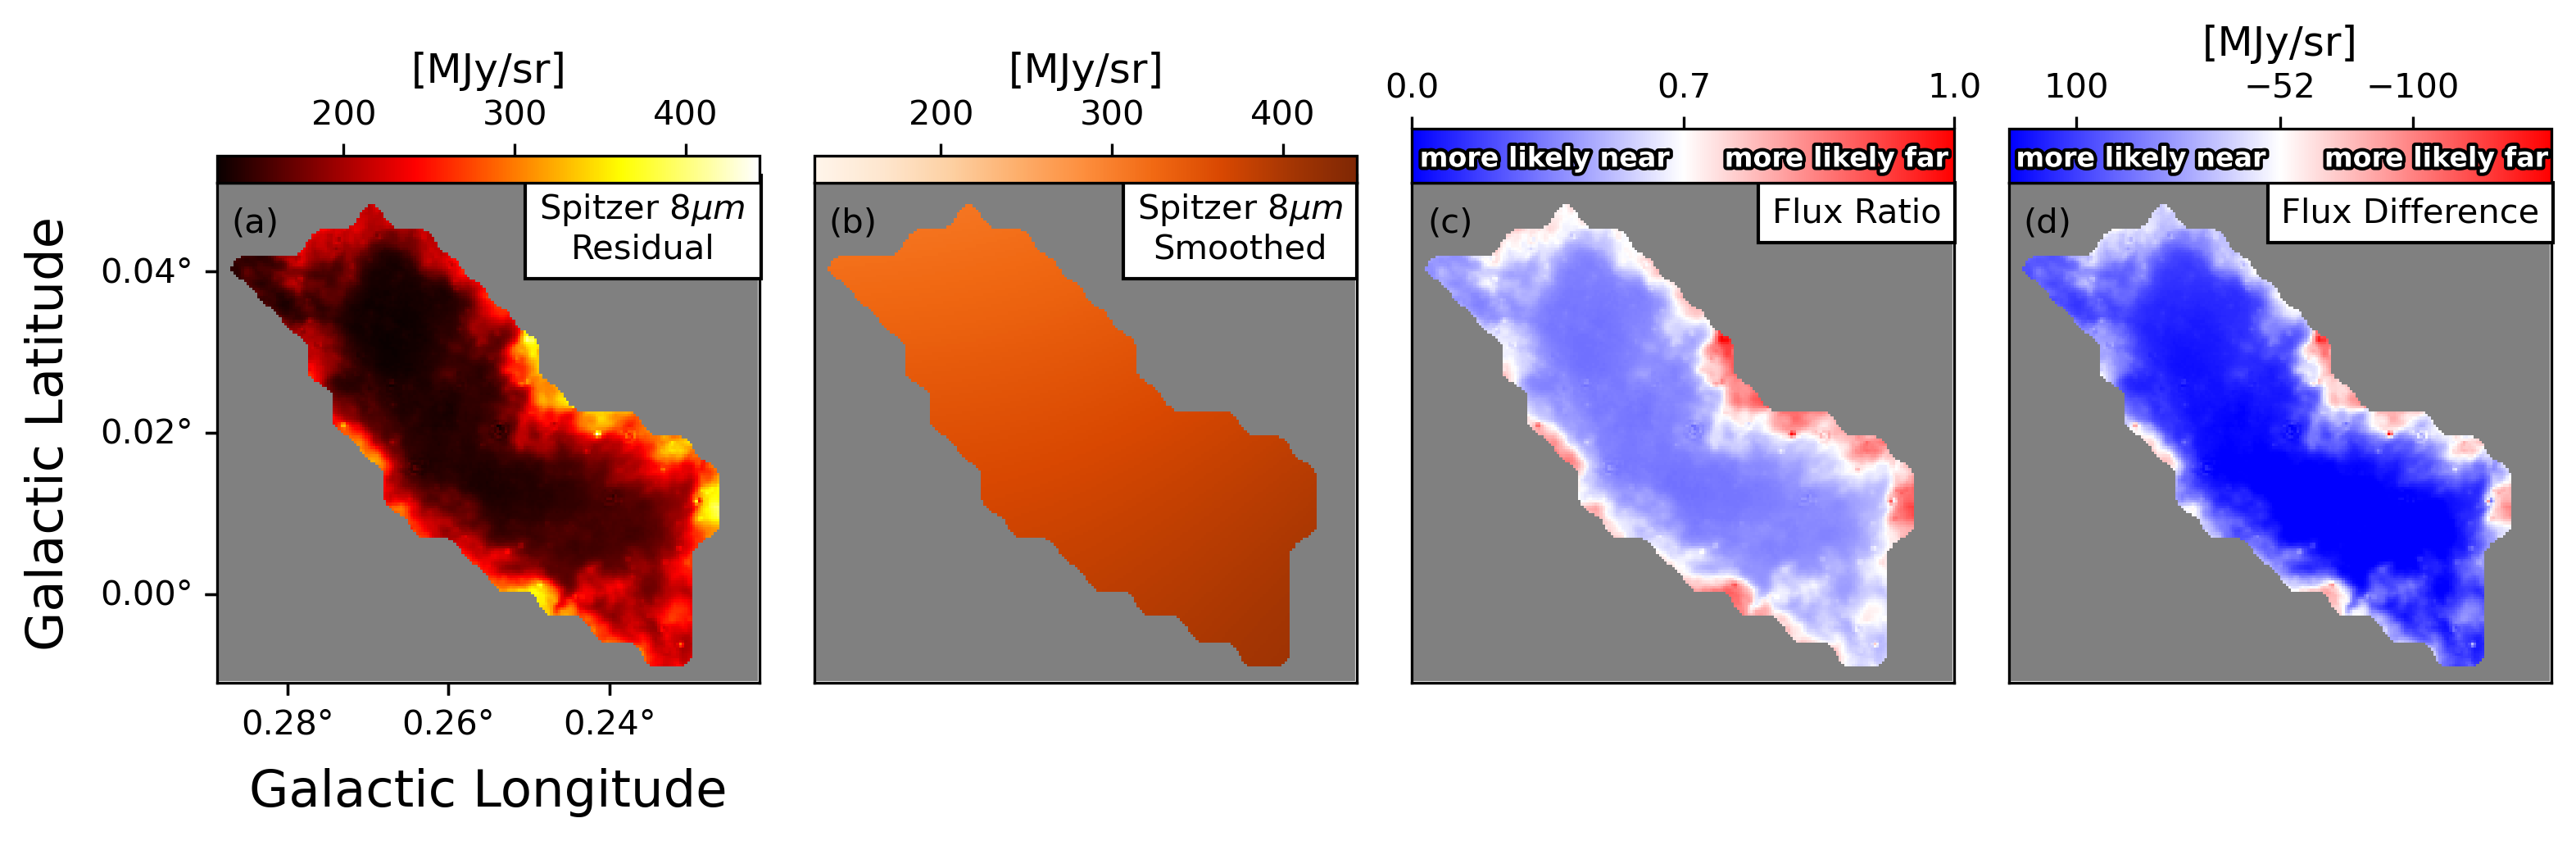

In [48]:
plot_flux_methods_6panel("G0.255+0.02")